In [62]:

import yfinance as yf
import yahoofinancials
import math 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,GRU
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
import yahoofinancials as yf
import yfinance as yf
import math
plt.style.use('fivethirtyeight')
plt.style.use('fivethirtyeight') # специальное отображение графиков для pyplot

In [63]:

mse = {}
mae = {}
rmse = {}
dates = {}

In [64]:
companies = ['AAPL', 'GOOG', 'MSFT', 'FB', 'AMZN', 'CMCSA', 'TDS', 'CVX', 'KO', 'JNJ', 'MCD', 'PSX',  'CAT', 'PLD', 'INTC', 'DIS', 'TSN', 'KMX', 'XOM', 'AEP', 'C', 'XRAY','WRK', 'KIM', 'CAH', 'MMM', 'HD', 'WM', 'ATVI', 'AON', 'MMC']
companies_1 = ['GOOG', 'FB', 'AMZN', 'CVX', 'KO', 'JNJ', 'MCD', 'PSX',  'CAT', 'PLD', 'INTC', 'DIS', 'TSN', 'KMX', 'XOM', 'AEP', 'C', 'XRAY','WRK', 'KIM', 'CAH', 'MMM', 'HD', 'WM', 'ATVI']

In [65]:
def pred(ticker):
    tick = yf.download(ticker, start='2010-01-01', end='2021-05-21', progress=False)
    
    plt.figure(figsize = (16,8))
    plt.title('Close Price History')
    plt.plot(tick['Close'])
    plt.xlabel('Date')
    plt.ylabel('Close price USD')
    plt.savefig('real stock ' + ticker + '.jpeg')
    
    
    # Создаем новый датафрейм только с колонкой "Close"
    data = tick.filter(['Close'])
    # преобразовываем в нумпаевский массив
    dataset = data.values
    # Вытаскиваем количество строк в дате для обучения модели (LSTM)
    training_data_len = math.ceil(len(dataset) * .8)
    
    #Scale the data (масштабируем)
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset) 
    
    # Создаем датасет для обучения
    train_data = scaled_data[0:training_data_len]
    
    # разбиваем на 2 выборки обучающаяся и тестирующая
    x_train = []
    y_train = []

    # создаем массив окон, который имеет термин скользящее окно
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i])
        y_train.append(train_data[i])

    #Конвертируем x_train и y_train в нумпаевский массив
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2]))
    
    model = Sequential()
    model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],x_train.shape[2])))
    model.add(LSTM(50,return_sequences = False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss = 'mean_squared_error')
    
    model.fit(x_train,y_train,batch_size = 71, epochs = 200)
    
    #Создаем тестовый датасет
    test_data = scaled_data[training_data_len - 60:]

    #по аналогии создаем x_test и y_test 
    x_test = []
    y_test = dataset[training_data_len:]
    for i in range(60,len(test_data)):
        x_test.append(test_data[i-60:i])
    
    x_test = np.array(x_test)
    
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    print("MSE: ", np.mean((predictions - y_test)**2))
    print("MAE: ", np.mean(abs(predictions - y_test)))
    print("RMSE: ", np.sqrt(np.mean((predictions-y_test)**2)))
    mse[ticker] = np.mean((predictions - y_test)**2)
    mae[ticker] = np.mean(abs(predictions - y_test))
    rmse[ticker] = np.sqrt(np.mean((predictions-y_test)**2))
                            
        #Строим график
    #train = data[:training_data_len]
    valid = data[training_data_len: ]
    valid['Predictions'] = predictions
    print(valid)
    dates[ticker] = valid
    #Визуализируем
    plt.figure(figsize=(16,8))
    plt.title('Model LSTM')
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel('Close Price',fontsize = 18)
    #plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.legend(['Train','Val','Pred'], loc = 'lower right')
    plt.savefig('prediction ' + ticker + '.jpeg')

Epoch 1/200
32/32 [==============================] - 4s 35ms/step - loss: 0.0068
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 1.6166e-04
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 6.1675e-05
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 6.3345e-05
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 6.4253e-05
Epoch 6/200
32/32 [==============================] - 1s 33ms/step - loss: 5.8088e-05
Epoch 7/200
32/32 [==============================] - 1s 33ms/step - loss: 5.3206e-05
Epoch 8/200
32/32 [==============================] - 1s 33ms/step - loss: 5.5702e-05
Epoch 9/200
32/32 [==============================] - 1s 33ms/step - loss: 5.7846e-05
Epoch 10/200
32/32 [==============================] - 1s 33ms/step - loss: 4.8465e-05
Epoch 11/200
32/32 [==============================] - 1s 33ms/step - loss: 4.6379e-05
Epoch 12/200
32/32 [==============================] - 1s 33ms/step 

32/32 [==============================] - 1s 36ms/step - loss: 1.4769e-05
Epoch 191/200
32/32 [==============================] - 1s 36ms/step - loss: 1.4011e-05
Epoch 192/200
32/32 [==============================] - 1s 36ms/step - loss: 1.3974e-05
Epoch 193/200
32/32 [==============================] - 1s 36ms/step - loss: 1.2244e-05
Epoch 194/200
32/32 [==============================] - 1s 35ms/step - loss: 1.3599e-05
Epoch 195/200
32/32 [==============================] - 1s 35ms/step - loss: 1.3132e-05
Epoch 196/200
32/32 [==============================] - 1s 35ms/step - loss: 1.5910e-05
Epoch 197/200
32/32 [==============================] - 1s 35ms/step - loss: 1.2582e-05
Epoch 198/200
32/32 [==============================] - 1s 35ms/step - loss: 1.5576e-05
Epoch 199/200
32/32 [==============================] - 1s 35ms/step - loss: 1.0361e-05
Epoch 200/200
32/32 [==============================] - 1s 36ms/step - loss: 1.4506e-05
MSE:  5.654843096898507
MAE:  1.6342425254835091
RMSE:  2

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0080
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 2.3216e-04
Epoch 3/200
32/32 [==============================] - 1s 34ms/step - loss: 9.7368e-05
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 9.0433e-05
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 9.5683e-05
Epoch 6/200
32/32 [==============================] - 1s 33ms/step - loss: 8.6274e-05
Epoch 7/200
32/32 [==============================] - 1s 33ms/step - loss: 9.6523e-05
Epoch 8/200
32/32 [==============================] - 1s 33ms/step - loss: 9.9159e-05
Epoch 9/200
32/32 [==============================] - 1s 33ms/step - loss: 8.6446e-05
Epoch 10/200
32/32 [==============================] - 1s 34ms/step - loss: 8.7039e-05
Epoch 11/200
32/32 [==============================] - 1s 35ms/step - loss: 8.7076e-05
Epoch 12/200
32/32 [==============================] - 1s 38ms/step 

32/32 [==============================] - 1s 37ms/step - loss: 2.3948e-05
Epoch 191/200
32/32 [==============================] - 1s 37ms/step - loss: 2.6875e-05
Epoch 192/200
32/32 [==============================] - 1s 37ms/step - loss: 2.5914e-05
Epoch 193/200
32/32 [==============================] - 1s 37ms/step - loss: 2.5639e-05
Epoch 194/200
32/32 [==============================] - 1s 37ms/step - loss: 2.2012e-05
Epoch 195/200
32/32 [==============================] - 1s 37ms/step - loss: 2.7416e-05
Epoch 196/200
32/32 [==============================] - 1s 37ms/step - loss: 2.7936e-05
Epoch 197/200
32/32 [==============================] - 1s 37ms/step - loss: 2.2948e-05
Epoch 198/200
32/32 [==============================] - 1s 37ms/step - loss: 2.1512e-05
Epoch 199/200
32/32 [==============================] - 1s 37ms/step - loss: 2.4661e-05
Epoch 200/200
32/32 [==============================] - 1s 37ms/step - loss: 2.4319e-05
MSE:  1399.88797604541
MAE:  27.008591577020614
RMSE:  37

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 33ms/step - loss: 0.0068
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 1.3676e-04
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 6.0606e-05
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 4.7038e-05
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 4.6618e-05
Epoch 6/200
32/32 [==============================] - 1s 33ms/step - loss: 5.2716e-05
Epoch 7/200
32/32 [==============================] - 1s 34ms/step - loss: 4.7001e-05
Epoch 8/200
32/32 [==============================] - 1s 34ms/step - loss: 4.4204e-05
Epoch 9/200
32/32 [==============================] - 1s 35ms/step - loss: 4.4972e-05
Epoch 10/200
32/32 [==============================] - 1s 36ms/step - loss: 4.1805e-05
Epoch 11/200
32/32 [==============================] - 1s 36ms/step - loss: 4.3851e-05
Epoch 12/200
32/32 [==============================] - 1s 36ms/step 

32/32 [==============================] - 1s 35ms/step - loss: 1.4974e-05
Epoch 191/200
32/32 [==============================] - 1s 35ms/step - loss: 1.5306e-05
Epoch 192/200
32/32 [==============================] - 1s 35ms/step - loss: 1.8702e-05
Epoch 193/200
32/32 [==============================] - 1s 36ms/step - loss: 1.3348e-05
Epoch 194/200
32/32 [==============================] - 1s 36ms/step - loss: 1.7510e-05
Epoch 195/200
32/32 [==============================] - 1s 35ms/step - loss: 1.4875e-05
Epoch 196/200
32/32 [==============================] - 1s 35ms/step - loss: 1.5053e-05
Epoch 197/200
32/32 [==============================] - 1s 35ms/step - loss: 1.5103e-05
Epoch 198/200
32/32 [==============================] - 1s 36ms/step - loss: 2.0607e-05
Epoch 199/200
32/32 [==============================] - 1s 35ms/step - loss: 1.8973e-05
Epoch 200/200
32/32 [==============================] - 1s 36ms/step - loss: 1.4026e-05
MSE:  20.584521834500745
MAE:  3.3890669657921917
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
25/25 [==============================] - 4s 34ms/step - loss: 0.0498
Epoch 2/200
25/25 [==============================] - 1s 33ms/step - loss: 0.0026
Epoch 3/200
25/25 [==============================] - 1s 33ms/step - loss: 4.2219e-04
Epoch 4/200
25/25 [==============================] - 1s 33ms/step - loss: 2.5780e-04
Epoch 5/200
25/25 [==============================] - 1s 33ms/step - loss: 2.4447e-04
Epoch 6/200
25/25 [==============================] - 1s 33ms/step - loss: 2.6116e-04
Epoch 7/200
25/25 [==============================] - 1s 33ms/step - loss: 2.3069e-04
Epoch 8/200
25/25 [==============================] - 1s 34ms/step - loss: 2.6305e-04
Epoch 9/200
25/25 [==============================] - 1s 33ms/step - loss: 2.2721e-04
Epoch 10/200
25/25 [==============================] - 1s 33ms/step - loss: 2.5237e-04
Epoch 11/200
25/25 [==============================] - 1s 34ms/step - loss: 2.5644e-04
Epoch 12/200
25/25 [==============================] - 1s 35ms/step - lo

25/25 [==============================] - 1s 37ms/step - loss: 5.7591e-05
Epoch 191/200
25/25 [==============================] - 1s 37ms/step - loss: 8.8993e-05
Epoch 192/200
25/25 [==============================] - 1s 37ms/step - loss: 4.5674e-05
Epoch 193/200
25/25 [==============================] - 1s 37ms/step - loss: 6.7418e-05
Epoch 194/200
25/25 [==============================] - 1s 37ms/step - loss: 8.4471e-05
Epoch 195/200
25/25 [==============================] - 1s 37ms/step - loss: 8.3572e-05
Epoch 196/200
25/25 [==============================] - 1s 36ms/step - loss: 5.7928e-05
Epoch 197/200
25/25 [==============================] - 1s 35ms/step - loss: 6.4107e-05
Epoch 198/200
25/25 [==============================] - 1s 36ms/step - loss: 5.8975e-05
Epoch 199/200
25/25 [==============================] - 1s 36ms/step - loss: 7.8698e-05
Epoch 200/200
25/25 [==============================] - 1s 36ms/step - loss: 6.7985e-05
MSE:  48.70868834240925
MAE:  5.304811187137831
RMSE:  6.

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0157
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 2.5138e-04
Epoch 3/200
32/32 [==============================] - 1s 34ms/step - loss: 8.9089e-05
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 9.1436e-05
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 8.3760e-05
Epoch 6/200
32/32 [==============================] - 1s 33ms/step - loss: 8.5306e-05
Epoch 7/200
32/32 [==============================] - 1s 33ms/step - loss: 1.0790e-04
Epoch 8/200
32/32 [==============================] - 1s 33ms/step - loss: 8.1971e-05
Epoch 9/200
32/32 [==============================] - 1s 33ms/step - loss: 6.9780e-05
Epoch 10/200
32/32 [==============================] - 1s 35ms/step - loss: 8.1560e-05
Epoch 11/200
32/32 [==============================] - 1s 36ms/step - loss: 7.0811e-05
Epoch 12/200
32/32 [==============================] - 1s 37ms/step 

32/32 [==============================] - 1s 36ms/step - loss: 2.5212e-05
Epoch 191/200
32/32 [==============================] - 1s 36ms/step - loss: 2.7770e-05
Epoch 192/200
32/32 [==============================] - 1s 36ms/step - loss: 2.6262e-05
Epoch 193/200
32/32 [==============================] - 1s 36ms/step - loss: 2.3316e-05
Epoch 194/200
32/32 [==============================] - 1s 37ms/step - loss: 2.5463e-05
Epoch 195/200
32/32 [==============================] - 1s 37ms/step - loss: 2.5691e-05
Epoch 196/200
32/32 [==============================] - 1s 37ms/step - loss: 3.0107e-05
Epoch 197/200
32/32 [==============================] - 1s 37ms/step - loss: 2.0988e-05
Epoch 198/200
32/32 [==============================] - 1s 37ms/step - loss: 2.9495e-05
Epoch 199/200
32/32 [==============================] - 1s 38ms/step - loss: 2.8108e-05
Epoch 200/200
32/32 [==============================] - 1s 37ms/step - loss: 5.1575e-05
MSE:  3121.7735898568058
MAE:  39.387048957651615
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 3s 33ms/step - loss: 0.0359
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 6.7986e-04
Epoch 3/200
32/32 [==============================] - 1s 37ms/step - loss: 2.4941e-04
Epoch 4/200
32/32 [==============================] - 1s 36ms/step - loss: 2.2793e-04
Epoch 5/200
32/32 [==============================] - 1s 43ms/step - loss: 2.1478e-04
Epoch 6/200
32/32 [==============================] - 1s 35ms/step - loss: 2.3644e-04
Epoch 7/200
32/32 [==============================] - 1s 36ms/step - loss: 2.2721e-04
Epoch 8/200
32/32 [==============================] - 1s 36ms/step - loss: 2.0364e-04
Epoch 9/200
32/32 [==============================] - 1s 37ms/step - loss: 1.9220e-04
Epoch 10/200
32/32 [==============================] - 1s 38ms/step - loss: 2.1075e-04
Epoch 11/200
32/32 [==============================] - 1s 37ms/step - loss: 2.0257e-04
Epoch 12/200
32/32 [==============================] - 1s 37ms/step 

32/32 [==============================] - 1s 34ms/step - loss: 6.1343e-05
Epoch 191/200
32/32 [==============================] - 1s 34ms/step - loss: 5.8093e-05
Epoch 192/200
32/32 [==============================] - 1s 34ms/step - loss: 5.5144e-05
Epoch 193/200
32/32 [==============================] - 1s 34ms/step - loss: 6.9409e-05
Epoch 194/200
32/32 [==============================] - 1s 34ms/step - loss: 5.6833e-05
Epoch 195/200
32/32 [==============================] - 1s 35ms/step - loss: 7.1388e-05
Epoch 196/200
32/32 [==============================] - 1s 35ms/step - loss: 5.9537e-05
Epoch 197/200
32/32 [==============================] - 1s 36ms/step - loss: 5.9353e-05
Epoch 198/200
32/32 [==============================] - 1s 36ms/step - loss: 6.7400e-05
Epoch 199/200
32/32 [==============================] - 1s 36ms/step - loss: 6.5484e-05
Epoch 200/200
32/32 [==============================] - 1s 36ms/step - loss: 5.8127e-05
MSE:  0.7224339305846399
MAE:  0.6398556960606866
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.1134
Epoch 2/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0049
Epoch 3/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0032
Epoch 4/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0026
Epoch 5/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0022
Epoch 6/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0023
Epoch 7/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0021
Epoch 8/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0020
Epoch 9/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0017
Epoch 10/200
32/32 [==============================] - 1s 35ms/step - loss: 0.0019
Epoch 11/200
32/32 [==============================] - 1s 35ms/step - loss: 0.0017
Epoch 12/200
32/32 [==============================] - 1s 36ms/step - loss: 0.0016
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 37ms/step - loss: 5.7143e-04
Epoch 192/200
32/32 [==============================] - 1s 37ms/step - loss: 5.4270e-04
Epoch 193/200
32/32 [==============================] - 1s 37ms/step - loss: 5.8644e-04
Epoch 194/200
32/32 [==============================] - 1s 37ms/step - loss: 5.6570e-04
Epoch 195/200
32/32 [==============================] - 1s 37ms/step - loss: 5.5133e-04
Epoch 196/200
32/32 [==============================] - 1s 37ms/step - loss: 5.5354e-04
Epoch 197/200
32/32 [==============================] - 1s 37ms/step - loss: 6.3238e-04
Epoch 198/200
32/32 [==============================] - 1s 37ms/step - loss: 5.3626e-04
Epoch 199/200
32/32 [==============================] - 1s 37ms/step - loss: 5.9305e-04
Epoch 200/200
32/32 [==============================] - 1s 37ms/step - loss: 5.6729e-04
MSE:  0.4369157222510859
MAE:  0.43710967591503735
RMSE:  0.6609960077421693
                Close  Predictions
Date                            

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0706
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0035
Epoch 3/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0019
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0015
Epoch 5/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0015
Epoch 6/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0015
Epoch 7/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0014
Epoch 8/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0014
Epoch 9/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0013
Epoch 10/200
32/32 [==============================] - 1s 35ms/step - loss: 0.0013
Epoch 11/200
32/32 [==============================] - 1s 36ms/step - loss: 0.0013
Epoch 12/200
32/32 [==============================] - 1s 36ms/step - loss: 0.0013
Epoch 13/200
32/32 [=====

32/32 [==============================] - 1s 37ms/step - loss: 2.8227e-04
Epoch 192/200
32/32 [==============================] - 1s 37ms/step - loss: 3.4523e-04
Epoch 193/200
32/32 [==============================] - 1s 35ms/step - loss: 3.2165e-04
Epoch 194/200
32/32 [==============================] - 1s 36ms/step - loss: 3.3449e-04
Epoch 195/200
32/32 [==============================] - 1s 37ms/step - loss: 3.2129e-04
Epoch 196/200
32/32 [==============================] - 1s 38ms/step - loss: 3.3650e-04
Epoch 197/200
32/32 [==============================] - 1s 36ms/step - loss: 3.1031e-04
Epoch 198/200
32/32 [==============================] - 1s 35ms/step - loss: 3.4244e-04
Epoch 199/200
32/32 [==============================] - 1s 34ms/step - loss: 3.4708e-04
Epoch 200/200
32/32 [==============================] - 1s 35ms/step - loss: 2.9740e-04
MSE:  5.272813426591299
MAE:  1.5740672938694713
RMSE:  2.2962607488243356
                 Close  Predictions
Date                             

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0500
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0018
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 6.1666e-04
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 4.8670e-04
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 4.8706e-04
Epoch 6/200
32/32 [==============================] - 1s 35ms/step - loss: 4.4861e-04
Epoch 7/200
32/32 [==============================] - 1s 34ms/step - loss: 4.8884e-04
Epoch 8/200
32/32 [==============================] - 1s 35ms/step - loss: 4.3665e-04
Epoch 9/200
32/32 [==============================] - 1s 38ms/step - loss: 4.5740e-04
Epoch 10/200
32/32 [==============================] - 1s 39ms/step - loss: 4.6079e-04
Epoch 11/200
32/32 [==============================] - 1s 38ms/step - loss: 4.3568e-04
Epoch 12/200
32/32 [==============================] - 1s 35ms/step - lo

32/32 [==============================] - 2s 47ms/step - loss: 1.2149e-04
Epoch 191/200
32/32 [==============================] - 2s 62ms/step - loss: 1.1156e-04
Epoch 192/200
32/32 [==============================] - 2s 63ms/step - loss: 1.4552e-04
Epoch 193/200
32/32 [==============================] - 2s 49ms/step - loss: 1.5350e-04
Epoch 194/200
32/32 [==============================] - 2s 58ms/step - loss: 1.3511e-04
Epoch 195/200
32/32 [==============================] - 2s 52ms/step - loss: 1.3076e-04
Epoch 196/200
32/32 [==============================] - 2s 56ms/step - loss: 1.1114e-04
Epoch 197/200
32/32 [==============================] - 2s 50ms/step - loss: 1.1546e-04
Epoch 198/200
32/32 [==============================] - 1s 45ms/step - loss: 1.2058e-04
Epoch 199/200
32/32 [==============================] - 1s 46ms/step - loss: 1.2134e-04
Epoch 200/200
32/32 [==============================] - 2s 49ms/step - loss: 1.2265e-04
MSE:  0.7151133384363128
MAE:  0.5728892980445742
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 37ms/step - loss: 0.0568
Epoch 2/200
32/32 [==============================] - 1s 38ms/step - loss: 9.5479e-04
Epoch 3/200
32/32 [==============================] - 1s 35ms/step - loss: 3.9950e-04
Epoch 4/200
32/32 [==============================] - 1s 37ms/step - loss: 3.9543e-04
Epoch 5/200
32/32 [==============================] - 1s 36ms/step - loss: 3.7707e-04
Epoch 6/200
32/32 [==============================] - 1s 40ms/step - loss: 3.5100e-04
Epoch 7/200
32/32 [==============================] - 1s 42ms/step - loss: 4.0031e-04
Epoch 8/200
32/32 [==============================] - 1s 45ms/step - loss: 4.0037e-04
Epoch 9/200
32/32 [==============================] - 1s 40ms/step - loss: 3.4359e-04
Epoch 10/200
32/32 [==============================] - 1s 44ms/step - loss: 3.5744e-04
Epoch 11/200
32/32 [==============================] - 1s 45ms/step - loss: 3.7294e-04
Epoch 12/200
32/32 [==============================] - 1s 41ms/step 

32/32 [==============================] - 1s 37ms/step - loss: 8.7396e-05
Epoch 191/200
32/32 [==============================] - 1s 37ms/step - loss: 1.1307e-04
Epoch 192/200
32/32 [==============================] - 1s 37ms/step - loss: 9.5353e-05
Epoch 193/200
32/32 [==============================] - 1s 37ms/step - loss: 7.4657e-05
Epoch 194/200
32/32 [==============================] - 1s 37ms/step - loss: 9.3405e-05
Epoch 195/200
32/32 [==============================] - 1s 36ms/step - loss: 8.7969e-05
Epoch 196/200
32/32 [==============================] - 1s 36ms/step - loss: 9.5035e-05
Epoch 197/200
32/32 [==============================] - 1s 35ms/step - loss: 1.2664e-04
Epoch 198/200
32/32 [==============================] - 1s 36ms/step - loss: 8.1317e-05
Epoch 199/200
32/32 [==============================] - 1s 40ms/step - loss: 7.9344e-05
Epoch 200/200
32/32 [==============================] - 1s 36ms/step - loss: 6.8370e-05
MSE:  4.681753666587413
MAE:  1.5116430552217972
RMSE:  2

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
<ipython-input-65-31b09e85ef0d>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (16,8))


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0317
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 5.1933e-04
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 2.3493e-04
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 2.3210e-04
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 2.2663e-04
Epoch 6/200
32/32 [==============================] - 1s 34ms/step - loss: 2.1052e-04
Epoch 7/200
32/32 [==============================] - 1s 35ms/step - loss: 2.2317e-04
Epoch 8/200
32/32 [==============================] - 1s 37ms/step - loss: 2.4823e-04
Epoch 9/200
32/32 [==============================] - 1s 37ms/step - loss: 2.1464e-04
Epoch 10/200
32/32 [==============================] - 1s 37ms/step - loss: 2.1485e-04
Epoch 11/200
32/32 [==============================] - 1s 38ms/step - loss: 1.9299e-04
Epoch 12/200
32/32 [==============================] - 1s 38ms/step 

32/32 [==============================] - 1s 37ms/step - loss: 5.3923e-05
Epoch 191/200
32/32 [==============================] - 1s 37ms/step - loss: 5.7572e-05
Epoch 192/200
32/32 [==============================] - 1s 37ms/step - loss: 5.0442e-05
Epoch 193/200
32/32 [==============================] - 1s 37ms/step - loss: 4.3661e-05
Epoch 194/200
32/32 [==============================] - 1s 37ms/step - loss: 5.0384e-05
Epoch 195/200
32/32 [==============================] - 1s 37ms/step - loss: 5.1612e-05
Epoch 196/200
32/32 [==============================] - 1s 37ms/step - loss: 7.2301e-05
Epoch 197/200
32/32 [==============================] - 1s 39ms/step - loss: 5.0056e-05
Epoch 198/200
32/32 [==============================] - 1s 38ms/step - loss: 4.4670e-05
Epoch 199/200
32/32 [==============================] - 1s 37ms/step - loss: 5.5892e-05
Epoch 200/200
32/32 [==============================] - 1s 37ms/step - loss: 5.1438e-05
MSE:  12.69362368373067
MAE:  2.3875893797549903
RMSE:  3

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
25/25 [==============================] - 3s 34ms/step - loss: 0.1013
Epoch 2/200
25/25 [==============================] - 1s 34ms/step - loss: 0.0044
Epoch 3/200
25/25 [==============================] - 1s 34ms/step - loss: 0.0019
Epoch 4/200
25/25 [==============================] - 1s 33ms/step - loss: 0.0011
Epoch 5/200
25/25 [==============================] - 1s 34ms/step - loss: 9.5138e-04
Epoch 6/200
25/25 [==============================] - 1s 33ms/step - loss: 9.8240e-04
Epoch 7/200
25/25 [==============================] - 1s 34ms/step - loss: 9.7180e-04
Epoch 8/200
25/25 [==============================] - 1s 33ms/step - loss: 0.0010
Epoch 9/200
25/25 [==============================] - 1s 33ms/step - loss: 9.6342e-04
Epoch 10/200
25/25 [==============================] - 1s 34ms/step - loss: 9.3039e-04
Epoch 11/200
25/25 [==============================] - 1s 35ms/step - loss: 8.6825e-04
Epoch 12/200
25/25 [==============================] - 1s 35ms/step - loss: 8.7794e-

25/25 [==============================] - 1s 41ms/step - loss: 1.8752e-04
Epoch 191/200
25/25 [==============================] - 1s 38ms/step - loss: 2.0221e-04
Epoch 192/200
25/25 [==============================] - 1s 39ms/step - loss: 1.9323e-04
Epoch 193/200
25/25 [==============================] - 1s 38ms/step - loss: 2.1165e-04
Epoch 194/200
25/25 [==============================] - 1s 39ms/step - loss: 1.8613e-04
Epoch 195/200
25/25 [==============================] - 1s 40ms/step - loss: 2.0893e-04
Epoch 196/200
25/25 [==============================] - 1s 39ms/step - loss: 2.0693e-04
Epoch 197/200
25/25 [==============================] - 1s 38ms/step - loss: 1.8322e-04
Epoch 198/200
25/25 [==============================] - 1s 38ms/step - loss: 2.0046e-04
Epoch 199/200
25/25 [==============================] - 1s 38ms/step - loss: 1.9353e-04
Epoch 200/200
25/25 [==============================] - 1s 38ms/step - loss: 2.0198e-04
MSE:  5.380401474737653
MAE:  1.6901375133397798
RMSE:  2

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0120
Epoch 2/200
32/32 [==============================] - 1s 38ms/step - loss: 5.8001e-04
Epoch 3/200
32/32 [==============================] - 771s 25s/step - loss: 3.9784e-04
Epoch 4/200
32/32 [==============================] - 2s 50ms/step - loss: 3.8264e-04
Epoch 5/200
32/32 [==============================] - 2s 70ms/step - loss: 3.7889e-04
Epoch 6/200
32/32 [==============================] - 1s 47ms/step - loss: 3.3520e-04
Epoch 7/200
32/32 [==============================] - 1s 39ms/step - loss: 3.4805e-04
Epoch 8/200
32/32 [==============================] - 1s 37ms/step - loss: 3.1331e-04
Epoch 9/200
32/32 [==============================] - 1s 36ms/step - loss: 2.8844e-04
Epoch 10/200
32/32 [==============================] - 1s 37ms/step - loss: 2.8768e-04
Epoch 11/200
32/32 [==============================] - 1s 36ms/step - loss: 2.7763e-04
Epoch 12/200
32/32 [==============================] - 1s 36ms/step

32/32 [==============================] - 1s 34ms/step - loss: 9.8480e-05
Epoch 191/200
32/32 [==============================] - 1s 34ms/step - loss: 8.0617e-05
Epoch 192/200
32/32 [==============================] - 1s 34ms/step - loss: 9.5551e-05
Epoch 193/200
32/32 [==============================] - 1s 34ms/step - loss: 9.7438e-05
Epoch 194/200
32/32 [==============================] - 1s 34ms/step - loss: 8.9700e-05
Epoch 195/200
32/32 [==============================] - 1s 34ms/step - loss: 9.0726e-05
Epoch 196/200
32/32 [==============================] - 1s 34ms/step - loss: 8.8875e-05
Epoch 197/200
32/32 [==============================] - 1s 34ms/step - loss: 8.7096e-05
Epoch 198/200
32/32 [==============================] - 1s 35ms/step - loss: 8.2637e-05
Epoch 199/200
32/32 [==============================] - 1s 34ms/step - loss: 8.6322e-05
Epoch 200/200
32/32 [==============================] - 1s 34ms/step - loss: 7.9019e-05
MSE:  10.788485864869337
MAE:  2.462843730187541
RMSE:  3

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0197
Epoch 2/200
32/32 [==============================] - 1s 34ms/step - loss: 4.6456e-04
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 2.3981e-04
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 2.1605e-04
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 2.2077e-04
Epoch 6/200
32/32 [==============================] - 1s 33ms/step - loss: 2.1863e-04
Epoch 7/200
32/32 [==============================] - 1s 33ms/step - loss: 2.1763e-04
Epoch 8/200
32/32 [==============================] - 1s 34ms/step - loss: 1.9695e-04
Epoch 9/200
32/32 [==============================] - 1s 35ms/step - loss: 2.0273e-04
Epoch 10/200
32/32 [==============================] - 1s 35ms/step - loss: 2.0156e-04
Epoch 11/200
32/32 [==============================] - 1s 35ms/step - loss: 1.8899e-04
Epoch 12/200
32/32 [==============================] - 1s 35ms/step 

32/32 [==============================] - 1s 39ms/step - loss: 4.7952e-05
Epoch 191/200
32/32 [==============================] - 1s 41ms/step - loss: 4.6780e-05
Epoch 192/200
32/32 [==============================] - 1s 46ms/step - loss: 4.5400e-05
Epoch 193/200
32/32 [==============================] - 2s 53ms/step - loss: 4.1661e-05
Epoch 194/200
32/32 [==============================] - 2s 54ms/step - loss: 4.8311e-05
Epoch 195/200
32/32 [==============================] - 2s 56ms/step - loss: 5.3953e-05
Epoch 196/200
32/32 [==============================] - 2s 55ms/step - loss: 4.6574e-05
Epoch 197/200
32/32 [==============================] - 2s 54ms/step - loss: 4.1608e-05
Epoch 198/200
32/32 [==============================] - 2s 55ms/step - loss: 5.3602e-05
Epoch 199/200
32/32 [==============================] - 2s 54ms/step - loss: 5.0924e-05
Epoch 200/200
32/32 [==============================] - 2s 54ms/step - loss: 5.2165e-05
MSE:  3.6908888561048667
MAE:  1.2997940422976828
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 51ms/step - loss: 0.0224
Epoch 2/200
32/32 [==============================] - 2s 53ms/step - loss: 6.8854e-04
Epoch 3/200
32/32 [==============================] - 2s 57ms/step - loss: 4.9941e-04
Epoch 4/200
32/32 [==============================] - 2s 54ms/step - loss: 4.8582e-04
Epoch 5/200
32/32 [==============================] - 2s 55ms/step - loss: 4.7901e-04
Epoch 6/200
32/32 [==============================] - 2s 56ms/step - loss: 4.0182e-04
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 4.3113e-04
Epoch 8/200
32/32 [==============================] - 3s 79ms/step - loss: 4.4443e-04
Epoch 9/200
32/32 [==============================] - 2s 65ms/step - loss: 4.5864e-04
Epoch 10/200
32/32 [==============================] - 3s 91ms/step - loss: 4.0531e-04
Epoch 11/200
32/32 [==============================] - 2s 67ms/step - loss: 4.0104e-04
Epoch 12/200
32/32 [==============================] - 2s 63ms/step 

32/32 [==============================] - 1s 34ms/step - loss: 1.1359e-04
Epoch 191/200
32/32 [==============================] - 1s 35ms/step - loss: 1.2019e-04
Epoch 192/200
32/32 [==============================] - 1s 35ms/step - loss: 1.3925e-04
Epoch 193/200
32/32 [==============================] - 1s 35ms/step - loss: 1.2499e-04
Epoch 194/200
32/32 [==============================] - 1s 34ms/step - loss: 1.2790e-04
Epoch 195/200
32/32 [==============================] - 1s 35ms/step - loss: 1.1779e-04
Epoch 196/200
32/32 [==============================] - 1s 35ms/step - loss: 1.1599e-04
Epoch 197/200
32/32 [==============================] - 1s 36ms/step - loss: 1.1717e-04
Epoch 198/200
32/32 [==============================] - 1s 35ms/step - loss: 1.2949e-04
Epoch 199/200
32/32 [==============================] - 1s 37ms/step - loss: 1.5567e-04
Epoch 200/200
32/32 [==============================] - 1s 39ms/step - loss: 1.2214e-04
MSE:  2.1106002538471413
MAE:  0.9465001224431276
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 34ms/step - loss: 0.0398
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 6.9537e-04
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 1.7781e-04
Epoch 4/200
32/32 [==============================] - 1s 33ms/step - loss: 1.7175e-04
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 1.7727e-04
Epoch 6/200
32/32 [==============================] - 1s 33ms/step - loss: 1.6864e-04
Epoch 7/200
32/32 [==============================] - 1s 33ms/step - loss: 1.7721e-04
Epoch 8/200
32/32 [==============================] - 1s 33ms/step - loss: 1.6933e-04
Epoch 9/200
32/32 [==============================] - 1s 33ms/step - loss: 1.7280e-04
Epoch 10/200
32/32 [==============================] - 1s 35ms/step - loss: 1.6731e-04
Epoch 11/200
32/32 [==============================] - 1s 35ms/step - loss: 1.5648e-04
Epoch 12/200
32/32 [==============================] - 1s 36ms/step 

32/32 [==============================] - 1s 37ms/step - loss: 4.8793e-05
Epoch 191/200
32/32 [==============================] - 1s 40ms/step - loss: 4.7588e-05
Epoch 192/200
32/32 [==============================] - 1s 39ms/step - loss: 5.1619e-05
Epoch 193/200
32/32 [==============================] - 1s 37ms/step - loss: 3.9106e-05
Epoch 194/200
32/32 [==============================] - 1s 37ms/step - loss: 4.6460e-05
Epoch 195/200
32/32 [==============================] - 1s 37ms/step - loss: 3.5903e-05
Epoch 196/200
32/32 [==============================] - 1s 39ms/step - loss: 4.1870e-05
Epoch 197/200
32/32 [==============================] - 1s 37ms/step - loss: 3.6072e-05
Epoch 198/200
32/32 [==============================] - 1s 39ms/step - loss: 3.9340e-05
Epoch 199/200
32/32 [==============================] - 1s 40ms/step - loss: 4.2976e-05
Epoch 200/200
32/32 [==============================] - 1s 39ms/step - loss: 3.8895e-05
MSE:  12.52460912491494
MAE:  2.4360980288520535
RMSE:  3

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 4s 35ms/step - loss: 0.0590
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 7.7384e-04
Epoch 3/200
32/32 [==============================] - 1s 33ms/step - loss: 4.2499e-04
Epoch 4/200
32/32 [==============================] - 1s 34ms/step - loss: 3.9089e-04
Epoch 5/200
32/32 [==============================] - 1s 35ms/step - loss: 4.1181e-04
Epoch 6/200
32/32 [==============================] - 1s 36ms/step - loss: 3.9059e-04
Epoch 7/200
32/32 [==============================] - 1s 37ms/step - loss: 3.9504e-04
Epoch 8/200
32/32 [==============================] - 1s 37ms/step - loss: 3.8660e-04
Epoch 9/200
32/32 [==============================] - 1s 36ms/step - loss: 3.8616e-04
Epoch 10/200
32/32 [==============================] - 1s 37ms/step - loss: 3.6772e-04
Epoch 11/200
32/32 [==============================] - 1s 37ms/step - loss: 3.7774e-04
Epoch 12/200
32/32 [==============================] - 1s 37ms/step 

32/32 [==============================] - 2s 56ms/step - loss: 9.0030e-05
Epoch 191/200
32/32 [==============================] - 2s 56ms/step - loss: 7.5578e-05
Epoch 192/200
32/32 [==============================] - 2s 55ms/step - loss: 9.1263e-05
Epoch 193/200
32/32 [==============================] - 2s 55ms/step - loss: 8.3970e-05
Epoch 194/200
32/32 [==============================] - 2s 54ms/step - loss: 9.9130e-05
Epoch 195/200
32/32 [==============================] - 2s 55ms/step - loss: 8.7132e-05
Epoch 196/200
32/32 [==============================] - 2s 57ms/step - loss: 1.0153e-04
Epoch 197/200
32/32 [==============================] - 2s 57ms/step - loss: 9.9232e-05
Epoch 198/200
32/32 [==============================] - 2s 56ms/step - loss: 1.1827e-04
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 9.6916e-05
Epoch 200/200
32/32 [==============================] - 2s 56ms/step - loss: 9.2309e-05
MSE:  2.4359394233982323
MAE:  1.1435311868344717
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 50ms/step - loss: 0.0245
Epoch 2/200
32/32 [==============================] - 2s 54ms/step - loss: 8.6001e-04
Epoch 3/200
32/32 [==============================] - 2s 54ms/step - loss: 3.5696e-04
Epoch 4/200
32/32 [==============================] - 2s 55ms/step - loss: 3.4715e-04
Epoch 5/200
32/32 [==============================] - 2s 57ms/step - loss: 3.4347e-04
Epoch 6/200
32/32 [==============================] - 2s 57ms/step - loss: 2.9732e-04
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 3.0995e-04
Epoch 8/200
32/32 [==============================] - 2s 58ms/step - loss: 3.0621e-04
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 3.0390e-04
Epoch 10/200
32/32 [==============================] - 2s 58ms/step - loss: 2.8186e-04
Epoch 11/200
32/32 [==============================] - 2s 56ms/step - loss: 2.5283e-04
Epoch 12/200
32/32 [==============================] - 2s 56ms/step 

32/32 [==============================] - 2s 55ms/step - loss: 6.1753e-05
Epoch 191/200
32/32 [==============================] - 2s 56ms/step - loss: 6.4945e-05
Epoch 192/200
32/32 [==============================] - 2s 57ms/step - loss: 7.9298e-05
Epoch 193/200
32/32 [==============================] - 2s 56ms/step - loss: 6.4523e-05
Epoch 194/200
32/32 [==============================] - 2s 59ms/step - loss: 6.1480e-05
Epoch 195/200
32/32 [==============================] - 2s 57ms/step - loss: 7.1169e-05
Epoch 196/200
32/32 [==============================] - 2s 56ms/step - loss: 6.3319e-05
Epoch 197/200
32/32 [==============================] - 2s 56ms/step - loss: 6.6225e-05
Epoch 198/200
32/32 [==============================] - 2s 55ms/step - loss: 7.9435e-05
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 6.4682e-05
Epoch 200/200
32/32 [==============================] - 2s 55ms/step - loss: 6.8808e-05
MSE:  5.711945918211248
MAE:  1.6629938654874632
RMSE:  2

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 53ms/step - loss: 0.2251
Epoch 2/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0044
Epoch 3/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0022
Epoch 4/200
32/32 [==============================] - 2s 58ms/step - loss: 0.0017
Epoch 5/200
32/32 [==============================] - 2s 65ms/step - loss: 0.0013
Epoch 6/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0011
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 9.7063e-04
Epoch 8/200
32/32 [==============================] - 2s 60ms/step - loss: 8.8187e-04
Epoch 9/200
32/32 [==============================] - 2s 59ms/step - loss: 9.0627e-04
Epoch 10/200
32/32 [==============================] - 2s 57ms/step - loss: 9.0450e-04
Epoch 11/200
32/32 [==============================] - 2s 57ms/step - loss: 9.0314e-04
Epoch 12/200
32/32 [==============================] - 2s 56ms/step - loss: 9.2495e-04
E

32/32 [==============================] - 2s 57ms/step - loss: 2.0104e-04
Epoch 191/200
32/32 [==============================] - 2s 56ms/step - loss: 1.7830e-04
Epoch 192/200
32/32 [==============================] - 2s 57ms/step - loss: 1.9252e-04
Epoch 193/200
32/32 [==============================] - 2s 57ms/step - loss: 1.9104e-04
Epoch 194/200
32/32 [==============================] - 2s 57ms/step - loss: 2.0181e-04
Epoch 195/200
32/32 [==============================] - 2s 57ms/step - loss: 1.8957e-04
Epoch 196/200
32/32 [==============================] - 2s 57ms/step - loss: 2.4528e-04
Epoch 197/200
32/32 [==============================] - 2s 55ms/step - loss: 2.1417e-04
Epoch 198/200
32/32 [==============================] - 2s 54ms/step - loss: 2.1003e-04
Epoch 199/200
32/32 [==============================] - 2s 55ms/step - loss: 1.9141e-04
Epoch 200/200
32/32 [==============================] - 2s 57ms/step - loss: 1.7041e-04
MSE:  2.5253369525578258
MAE:  1.1925767362637878
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 54ms/step - loss: 0.0368
Epoch 2/200
32/32 [==============================] - 2s 53ms/step - loss: 7.2903e-04
Epoch 3/200
32/32 [==============================] - 2s 55ms/step - loss: 3.7282e-04
Epoch 4/200
32/32 [==============================] - 2s 55ms/step - loss: 3.2266e-04
Epoch 5/200
32/32 [==============================] - 2s 55ms/step - loss: 3.3425e-04
Epoch 6/200
32/32 [==============================] - 2s 55ms/step - loss: 3.4940e-04
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 3.0657e-04
Epoch 8/200
32/32 [==============================] - 2s 57ms/step - loss: 2.9215e-04
Epoch 9/200
32/32 [==============================] - 2s 57ms/step - loss: 2.8476e-04
Epoch 10/200
32/32 [==============================] - 2s 57ms/step - loss: 2.9718e-04
Epoch 11/200
32/32 [==============================] - 2s 56ms/step - loss: 2.9908e-04
Epoch 12/200
32/32 [==============================] - 2s 54ms/step 

32/32 [==============================] - 2s 54ms/step - loss: 6.1981e-05
Epoch 191/200
32/32 [==============================] - 2s 55ms/step - loss: 6.4012e-05
Epoch 192/200
32/32 [==============================] - 2s 55ms/step - loss: 6.4467e-05
Epoch 193/200
32/32 [==============================] - 2s 56ms/step - loss: 6.4307e-05
Epoch 194/200
32/32 [==============================] - 2s 57ms/step - loss: 7.1394e-05
Epoch 195/200
32/32 [==============================] - 2s 57ms/step - loss: 8.7213e-05
Epoch 196/200
32/32 [==============================] - 2s 57ms/step - loss: 7.1580e-05
Epoch 197/200
32/32 [==============================] - 2s 57ms/step - loss: 7.2892e-05
Epoch 198/200
32/32 [==============================] - 2s 57ms/step - loss: 6.3963e-05
Epoch 199/200
32/32 [==============================] - 2s 57ms/step - loss: 6.9194e-05
Epoch 200/200
32/32 [==============================] - 2s 55ms/step - loss: 6.8427e-05
MSE:  2.3378851865962744
MAE:  0.9806704695936272
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 50ms/step - loss: 0.1179
Epoch 2/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0051
Epoch 3/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0013
Epoch 4/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0012
Epoch 5/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0012
Epoch 6/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0011
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0012
Epoch 8/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0011
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0011
Epoch 10/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0011
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0010
Epoch 12/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0010
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 55ms/step - loss: 2.3115e-04
Epoch 191/200
32/32 [==============================] - 2s 55ms/step - loss: 2.4154e-04
Epoch 192/200
32/32 [==============================] - 2s 55ms/step - loss: 2.4504e-04
Epoch 193/200
32/32 [==============================] - 2s 55ms/step - loss: 2.9366e-04
Epoch 194/200
32/32 [==============================] - 2s 54ms/step - loss: 2.0827e-04
Epoch 195/200
32/32 [==============================] - 2s 54ms/step - loss: 2.5275e-04
Epoch 196/200
32/32 [==============================] - 2s 54ms/step - loss: 2.3357e-04
Epoch 197/200
32/32 [==============================] - 2s 56ms/step - loss: 2.6645e-04
Epoch 198/200
32/32 [==============================] - 2s 57ms/step - loss: 2.3176e-04
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 2.2395e-04
Epoch 200/200
32/32 [==============================] - 2s 56ms/step - loss: 2.1863e-04
MSE:  2.703544528741602
MAE:  1.1413117786560592
RMSE:  1

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 52ms/step - loss: 0.0563
Epoch 2/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0023
Epoch 3/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0014
Epoch 4/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0012
Epoch 5/200
32/32 [==============================] - 2s 55ms/step - loss: 0.0013
Epoch 6/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0014
Epoch 7/200
32/32 [==============================] - 2s 58ms/step - loss: 0.0013
Epoch 8/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0013
Epoch 9/200
32/32 [==============================] - 2s 58ms/step - loss: 0.0012
Epoch 10/200
32/32 [==============================] - 2s 58ms/step - loss: 0.0011
Epoch 11/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0011
Epoch 12/200
32/32 [==============================] - 2s 56ms/step - loss: 0.0011
Epoch 13/200
32/32 [=====

32/32 [==============================] - 2s 56ms/step - loss: 2.7124e-04
Epoch 98/200
32/32 [==============================] - 2s 57ms/step - loss: 3.4434e-04
Epoch 99/200
32/32 [==============================] - 2s 57ms/step - loss: 2.7031e-04
Epoch 100/200
32/32 [==============================] - 2s 58ms/step - loss: 2.7900e-04
Epoch 101/200
32/32 [==============================] - 2s 56ms/step - loss: 2.8125e-04
Epoch 102/200
32/32 [==============================] - 2s 55ms/step - loss: 2.4019e-04
Epoch 103/200
32/32 [==============================] - 2s 56ms/step - loss: 2.6969e-04
Epoch 104/200
32/32 [==============================] - 2s 55ms/step - loss: 2.6764e-04
Epoch 105/200
32/32 [==============================] - 2s 54ms/step - loss: 2.7091e-04
Epoch 106/200
32/32 [==============================] - 2s 55ms/step - loss: 3.6626e-04
Epoch 107/200
32/32 [==============================] - 2s 55ms/step - loss: 2.7486e-04
Epoch 108/200
32/32 [==============================] - 2s 5

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
16/16 [==============================] - 5s 54ms/step - loss: 0.1230
Epoch 2/200
16/16 [==============================] - 1s 52ms/step - loss: 0.0120
Epoch 3/200
16/16 [==============================] - 1s 53ms/step - loss: 0.0041
Epoch 4/200
16/16 [==============================] - 1s 53ms/step - loss: 0.0029
Epoch 5/200
16/16 [==============================] - 1s 54ms/step - loss: 0.0020
Epoch 6/200
16/16 [==============================] - 1s 55ms/step - loss: 0.0019
Epoch 7/200
16/16 [==============================] - 1s 54ms/step - loss: 0.0020
Epoch 8/200
16/16 [==============================] - 1s 56ms/step - loss: 0.0015
Epoch 9/200
16/16 [==============================] - 1s 57ms/step - loss: 0.0020
Epoch 10/200
16/16 [==============================] - 1s 56ms/step - loss: 0.0020
Epoch 11/200
16/16 [==============================] - 1s 57ms/step - loss: 0.0017
Epoch 12/200
16/16 [==============================] - 1s 57ms/step - loss: 0.0016
Epoch 13/200
16/16 [=====

16/16 [==============================] - 1s 54ms/step - loss: 3.9357e-04
Epoch 193/200
16/16 [==============================] - 1s 55ms/step - loss: 3.8142e-04
Epoch 194/200
16/16 [==============================] - 1s 55ms/step - loss: 4.2092e-04
Epoch 195/200
16/16 [==============================] - 1s 55ms/step - loss: 3.9373e-04
Epoch 196/200
16/16 [==============================] - 1s 57ms/step - loss: 3.7508e-04
Epoch 197/200
16/16 [==============================] - 1s 56ms/step - loss: 3.6903e-04
Epoch 198/200
16/16 [==============================] - 1s 57ms/step - loss: 3.9857e-04
Epoch 199/200
16/16 [==============================] - 1s 57ms/step - loss: 3.9385e-04
Epoch 200/200
16/16 [==============================] - 1s 59ms/step - loss: 3.9165e-04
MSE:  1.5972331882252493
MAE:  0.9867295287674926
RMSE:  1.2638169124621055
                Close  Predictions
Date                              
2020-03-18  23.450001    24.748928
2020-03-19  25.160000    24.358448
2020-03-20  25.

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 54ms/step - loss: 0.0643
Epoch 2/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0025
Epoch 3/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0010
Epoch 4/200
32/32 [==============================] - 2s 55ms/step - loss: 8.2255e-04
Epoch 5/200
32/32 [==============================] - 2s 56ms/step - loss: 7.6144e-04
Epoch 6/200
32/32 [==============================] - 2s 57ms/step - loss: 7.5680e-04
Epoch 7/200
32/32 [==============================] - 2s 58ms/step - loss: 7.9737e-04
Epoch 8/200
32/32 [==============================] - 2s 56ms/step - loss: 8.0891e-04
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 7.2726e-04
Epoch 10/200
32/32 [==============================] - 2s 56ms/step - loss: 7.1640e-04
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 6.6548e-04
Epoch 12/200
32/32 [==============================] - 2s 55ms/step - loss: 

32/32 [==============================] - 2s 57ms/step - loss: 1.6392e-04
Epoch 191/200
32/32 [==============================] - 2s 57ms/step - loss: 1.9031e-04
Epoch 192/200
32/32 [==============================] - 2s 57ms/step - loss: 1.8652e-04
Epoch 193/200
32/32 [==============================] - 2s 56ms/step - loss: 1.6350e-04
Epoch 194/200
32/32 [==============================] - 2s 56ms/step - loss: 1.6979e-04
Epoch 195/200
32/32 [==============================] - 2s 57ms/step - loss: 1.8827e-04
Epoch 196/200
32/32 [==============================] - 2s 55ms/step - loss: 1.6441e-04
Epoch 197/200
32/32 [==============================] - 2s 55ms/step - loss: 1.9048e-04
Epoch 198/200
32/32 [==============================] - 2s 55ms/step - loss: 1.6457e-04
Epoch 199/200
32/32 [==============================] - 2s 54ms/step - loss: 1.7934e-04
Epoch 200/200
32/32 [==============================] - 2s 54ms/step - loss: 1.7974e-04
MSE:  0.21343493045484307
MAE:  0.3127914090847262
RMSE: 

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 51ms/step - loss: 0.1012
Epoch 2/200
32/32 [==============================] - 1s 42ms/step - loss: 0.0027
Epoch 3/200
32/32 [==============================] - 1s 43ms/step - loss: 0.0011
Epoch 4/200
32/32 [==============================] - 1s 41ms/step - loss: 0.0011
Epoch 5/200
32/32 [==============================] - 1s 41ms/step - loss: 0.0011
Epoch 6/200
32/32 [==============================] - 1s 44ms/step - loss: 0.0010
Epoch 7/200
32/32 [==============================] - 2s 49ms/step - loss: 9.1570e-04
Epoch 8/200
32/32 [==============================] - 2s 52ms/step - loss: 9.9079e-04
Epoch 9/200
32/32 [==============================] - 2s 55ms/step - loss: 9.0407e-04
Epoch 10/200
32/32 [==============================] - 2s 54ms/step - loss: 9.0833e-04
Epoch 11/200
32/32 [==============================] - 2s 53ms/step - loss: 8.7748e-04
Epoch 12/200
32/32 [==============================] - 2s 55ms/step - loss: 9.2606e-04
E

32/32 [==============================] - 2s 55ms/step - loss: 2.2915e-04
Epoch 191/200
32/32 [==============================] - 2s 54ms/step - loss: 2.5362e-04
Epoch 192/200
32/32 [==============================] - 2s 55ms/step - loss: 2.4183e-04
Epoch 193/200
32/32 [==============================] - 2s 54ms/step - loss: 2.3694e-04
Epoch 194/200
32/32 [==============================] - 1s 46ms/step - loss: 2.4748e-04
Epoch 195/200
32/32 [==============================] - 1s 42ms/step - loss: 2.4367e-04
Epoch 196/200
32/32 [==============================] - 1s 43ms/step - loss: 3.0787e-04
Epoch 197/200
32/32 [==============================] - 1s 42ms/step - loss: 2.8280e-04
Epoch 198/200
32/32 [==============================] - 1s 46ms/step - loss: 2.7337e-04
Epoch 199/200
32/32 [==============================] - 2s 53ms/step - loss: 2.5020e-04
Epoch 200/200
32/32 [==============================] - 2s 53ms/step - loss: 3.0166e-04
MSE:  1.3443864741619944
MAE:  0.8359603216094704
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 55ms/step - loss: 0.0762
Epoch 2/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0015
Epoch 3/200
32/32 [==============================] - 2s 55ms/step - loss: 4.4614e-04
Epoch 4/200
32/32 [==============================] - 2s 54ms/step - loss: 3.8486e-04
Epoch 5/200
32/32 [==============================] - 2s 54ms/step - loss: 3.8799e-04
Epoch 6/200
32/32 [==============================] - 2s 55ms/step - loss: 4.2622e-04
Epoch 7/200
32/32 [==============================] - 2s 56ms/step - loss: 3.8309e-04
Epoch 8/200
32/32 [==============================] - 2s 58ms/step - loss: 3.8717e-04
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 4.3386e-04
Epoch 10/200
32/32 [==============================] - 2s 56ms/step - loss: 3.9019e-04
Epoch 11/200
32/32 [==============================] - 2s 57ms/step - loss: 3.7149e-04
Epoch 12/200
32/32 [==============================] - 2s 57ms/step - lo

32/32 [==============================] - 2s 59ms/step - loss: 9.0877e-05
Epoch 191/200
32/32 [==============================] - 2s 58ms/step - loss: 9.8175e-05
Epoch 192/200
32/32 [==============================] - 2s 62ms/step - loss: 1.4041e-04
Epoch 193/200
32/32 [==============================] - 2s 59ms/step - loss: 1.3501e-04
Epoch 194/200
32/32 [==============================] - 2s 59ms/step - loss: 8.7671e-05
Epoch 195/200
32/32 [==============================] - 2s 60ms/step - loss: 1.1461e-04
Epoch 196/200
32/32 [==============================] - 2s 58ms/step - loss: 9.9488e-05
Epoch 197/200
32/32 [==============================] - 2s 55ms/step - loss: 1.0158e-04
Epoch 198/200
32/32 [==============================] - 2s 58ms/step - loss: 9.6975e-05
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 9.8268e-05
Epoch 200/200
32/32 [==============================] - 2s 56ms/step - loss: 1.1370e-04
MSE:  9.959308459003331
MAE:  2.1642389480564193
RMSE:  3

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 53ms/step - loss: 0.0299
Epoch 2/200
32/32 [==============================] - 2s 53ms/step - loss: 3.8217e-04
Epoch 3/200
32/32 [==============================] - 2s 54ms/step - loss: 1.0456e-04
Epoch 4/200
32/32 [==============================] - 2s 56ms/step - loss: 9.5011e-05
Epoch 5/200
32/32 [==============================] - 2s 57ms/step - loss: 9.5355e-05
Epoch 6/200
32/32 [==============================] - 2s 57ms/step - loss: 8.6478e-05
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 1.0018e-04
Epoch 8/200
32/32 [==============================] - 2s 57ms/step - loss: 9.6325e-05
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 1.0222e-04
Epoch 10/200
32/32 [==============================] - 2s 55ms/step - loss: 8.6262e-05
Epoch 11/200
32/32 [==============================] - 2s 55ms/step - loss: 1.0031e-04
Epoch 12/200
32/32 [==============================] - 2s 55ms/step 

32/32 [==============================] - 2s 54ms/step - loss: 2.8289e-05
Epoch 191/200
32/32 [==============================] - 2s 55ms/step - loss: 2.6862e-05
Epoch 192/200
32/32 [==============================] - 2s 55ms/step - loss: 2.3586e-05
Epoch 193/200
32/32 [==============================] - 2s 53ms/step - loss: 2.0172e-05
Epoch 194/200
32/32 [==============================] - 2s 55ms/step - loss: 2.6917e-05
Epoch 195/200
32/32 [==============================] - 2s 57ms/step - loss: 2.5769e-05
Epoch 196/200
32/32 [==============================] - 2s 56ms/step - loss: 2.6865e-05
Epoch 197/200
32/32 [==============================] - 2s 57ms/step - loss: 2.5235e-05
Epoch 198/200
32/32 [==============================] - 2s 58ms/step - loss: 2.3964e-05
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 2.4927e-05
Epoch 200/200
32/32 [==============================] - 2s 55ms/step - loss: 2.7199e-05
MSE:  21.730259308088847
MAE:  3.2072237024756625
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 54ms/step - loss: 0.0200
Epoch 2/200
32/32 [==============================] - 2s 54ms/step - loss: 3.9836e-04
Epoch 3/200
32/32 [==============================] - 2s 57ms/step - loss: 1.6205e-04
Epoch 4/200
32/32 [==============================] - 2s 57ms/step - loss: 1.3132e-04
Epoch 5/200
32/32 [==============================] - 2s 58ms/step - loss: 1.2352e-04
Epoch 6/200
32/32 [==============================] - 2s 57ms/step - loss: 1.1440e-04
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 1.2696e-04
Epoch 8/200
32/32 [==============================] - 2s 58ms/step - loss: 1.1563e-04
Epoch 9/200
32/32 [==============================] - 2s 58ms/step - loss: 1.2991e-04
Epoch 10/200
32/32 [==============================] - 2s 55ms/step - loss: 1.3135e-04
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 1.2307e-04
Epoch 12/200
32/32 [==============================] - 2s 55ms/step 

32/32 [==============================] - 2s 55ms/step - loss: 2.5834e-05
Epoch 191/200
32/32 [==============================] - 2s 55ms/step - loss: 3.3375e-05
Epoch 192/200
32/32 [==============================] - 2s 57ms/step - loss: 2.2380e-05
Epoch 193/200
32/32 [==============================] - 2s 56ms/step - loss: 2.6955e-05
Epoch 194/200
32/32 [==============================] - 2s 55ms/step - loss: 2.9558e-05
Epoch 195/200
32/32 [==============================] - 2s 55ms/step - loss: 3.5487e-05
Epoch 196/200
32/32 [==============================] - 2s 55ms/step - loss: 2.6955e-05
Epoch 197/200
32/32 [==============================] - 2s 56ms/step - loss: 2.5049e-05
Epoch 198/200
32/32 [==============================] - 2s 55ms/step - loss: 2.4207e-05
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 2.4027e-05
Epoch 200/200
32/32 [==============================] - 2s 54ms/step - loss: 2.3601e-05
MSE:  3.7772991812034604
MAE:  1.3613444489750355
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 6s 53ms/step - loss: 0.0310
Epoch 2/200
32/32 [==============================] - 2s 53ms/step - loss: 7.5367e-04
Epoch 3/200
32/32 [==============================] - 2s 52ms/step - loss: 4.4618e-04
Epoch 4/200
32/32 [==============================] - 2s 54ms/step - loss: 4.1847e-04
Epoch 5/200
32/32 [==============================] - 2s 56ms/step - loss: 3.5880e-04
Epoch 6/200
32/32 [==============================] - 2s 55ms/step - loss: 3.3458e-04
Epoch 7/200
32/32 [==============================] - 2s 56ms/step - loss: 3.0354e-04
Epoch 8/200
32/32 [==============================] - 2s 56ms/step - loss: 3.4156e-04
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 2.7670e-04
Epoch 10/200
32/32 [==============================] - 2s 56ms/step - loss: 2.9403e-04
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 3.3047e-04
Epoch 12/200
32/32 [==============================] - 2s 54ms/step 

32/32 [==============================] - 2s 54ms/step - loss: 9.6332e-05
Epoch 191/200
32/32 [==============================] - 2s 54ms/step - loss: 8.3118e-05
Epoch 192/200
32/32 [==============================] - 2s 54ms/step - loss: 7.7400e-05
Epoch 193/200
32/32 [==============================] - 2s 54ms/step - loss: 7.3630e-05
Epoch 194/200
32/32 [==============================] - 2s 55ms/step - loss: 7.4803e-05
Epoch 195/200
32/32 [==============================] - 2s 55ms/step - loss: 8.5722e-05
Epoch 196/200
32/32 [==============================] - 2s 56ms/step - loss: 7.9376e-05
Epoch 197/200
32/32 [==============================] - 2s 56ms/step - loss: 7.9002e-05
Epoch 198/200
32/32 [==============================] - 2s 57ms/step - loss: 8.3399e-05
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 7.0301e-05
Epoch 200/200
32/32 [==============================] - 2s 55ms/step - loss: 7.5329e-05
MSE:  2.852345221809871
MAE:  1.279793384811641
RMSE:  1.

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 51ms/step - loss: 0.0133
Epoch 2/200
32/32 [==============================] - 2s 54ms/step - loss: 3.6857e-04
Epoch 3/200
32/32 [==============================] - 2s 54ms/step - loss: 1.2665e-04
Epoch 4/200
32/32 [==============================] - 2s 57ms/step - loss: 1.2249e-04
Epoch 5/200
32/32 [==============================] - 2s 57ms/step - loss: 1.3013e-04
Epoch 6/200
32/32 [==============================] - 2s 56ms/step - loss: 1.2295e-04
Epoch 7/200
32/32 [==============================] - 2s 56ms/step - loss: 1.1501e-04
Epoch 8/200
32/32 [==============================] - 2s 56ms/step - loss: 1.2090e-04
Epoch 9/200
32/32 [==============================] - 2s 56ms/step - loss: 1.1870e-04
Epoch 10/200
32/32 [==============================] - 2s 54ms/step - loss: 1.1567e-04
Epoch 11/200
32/32 [==============================] - 2s 55ms/step - loss: 1.1721e-04
Epoch 12/200
32/32 [==============================] - 2s 54ms/step 

32/32 [==============================] - 2s 57ms/step - loss: 3.4097e-05
Epoch 191/200
32/32 [==============================] - 2s 56ms/step - loss: 2.2628e-05
Epoch 192/200
32/32 [==============================] - 2s 55ms/step - loss: 2.5988e-05
Epoch 193/200
32/32 [==============================] - 2s 54ms/step - loss: 2.3255e-05
Epoch 194/200
32/32 [==============================] - 2s 55ms/step - loss: 2.5374e-05
Epoch 195/200
32/32 [==============================] - 2s 55ms/step - loss: 2.3748e-05
Epoch 196/200
32/32 [==============================] - 2s 54ms/step - loss: 2.5699e-05
Epoch 197/200
32/32 [==============================] - 2s 54ms/step - loss: 2.5408e-05
Epoch 198/200
32/32 [==============================] - 2s 54ms/step - loss: 2.4716e-05
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 2.6439e-05
Epoch 200/200
32/32 [==============================] - 2s 57ms/step - loss: 3.5245e-05
MSE:  15.386698141811907
MAE:  2.5521496411601494
RMSE:  

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/200
32/32 [==============================] - 5s 52ms/step - loss: 0.0349
Epoch 2/200
32/32 [==============================] - 2s 53ms/step - loss: 5.6578e-04
Epoch 3/200
32/32 [==============================] - 2s 52ms/step - loss: 1.4292e-04
Epoch 4/200
32/32 [==============================] - 2s 54ms/step - loss: 1.3812e-04
Epoch 5/200
32/32 [==============================] - 2s 56ms/step - loss: 1.2404e-04
Epoch 6/200
32/32 [==============================] - 2s 56ms/step - loss: 1.2232e-04
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 1.0853e-04
Epoch 8/200
32/32 [==============================] - 2s 56ms/step - loss: 1.1973e-04
Epoch 9/200
32/32 [==============================] - 2s 57ms/step - loss: 1.2233e-04
Epoch 10/200
32/32 [==============================] - 2s 57ms/step - loss: 1.3553e-04
Epoch 11/200
32/32 [==============================] - 2s 54ms/step - loss: 1.2838e-04
Epoch 12/200
32/32 [==============================] - 2s 55ms/step 

32/32 [==============================] - 2s 55ms/step - loss: 2.8527e-05
Epoch 191/200
32/32 [==============================] - 2s 55ms/step - loss: 2.9168e-05
Epoch 192/200
32/32 [==============================] - 2s 55ms/step - loss: 3.1232e-05
Epoch 193/200
32/32 [==============================] - 2s 54ms/step - loss: 2.9453e-05
Epoch 194/200
32/32 [==============================] - 2s 55ms/step - loss: 2.8516e-05
Epoch 195/200
32/32 [==============================] - 2s 55ms/step - loss: 2.8591e-05
Epoch 196/200
32/32 [==============================] - 2s 55ms/step - loss: 3.0916e-05
Epoch 197/200
32/32 [==============================] - 2s 55ms/step - loss: 3.2036e-05
Epoch 198/200
32/32 [==============================] - 2s 56ms/step - loss: 2.4398e-05
Epoch 199/200
32/32 [==============================] - 2s 56ms/step - loss: 3.0539e-05
Epoch 200/200
32/32 [==============================] - 2s 56ms/step - loss: 3.1298e-05
MSE:  3.246844267476688
MAE:  1.2022789494113357
RMSE:  1

<ipython-input-65-31b09e85ef0d>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


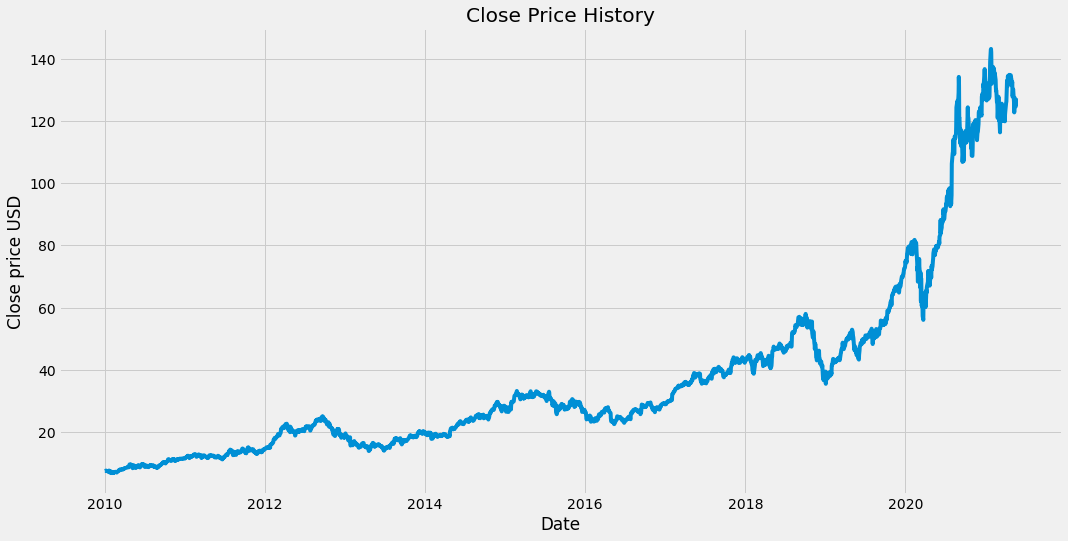

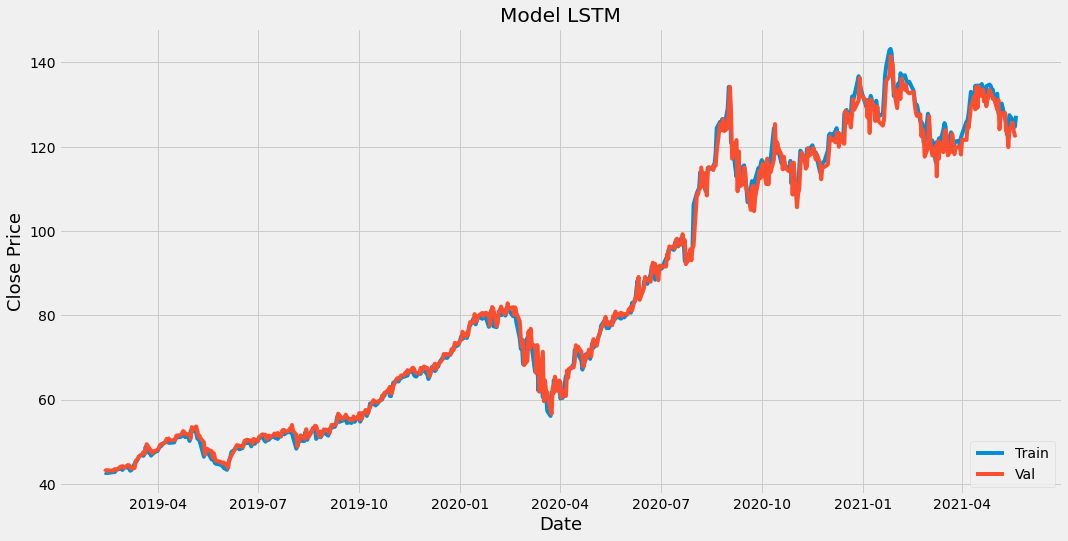

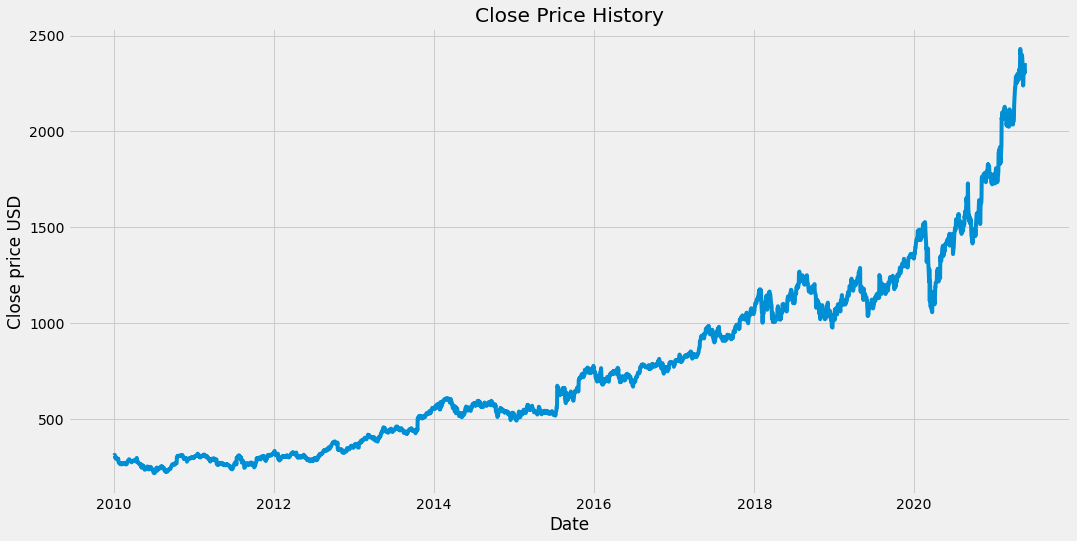

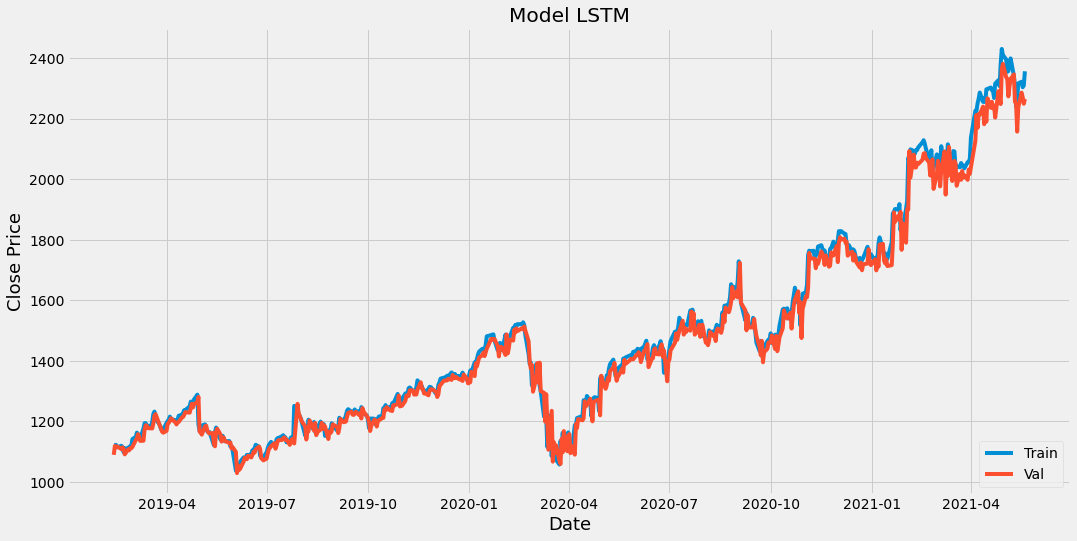

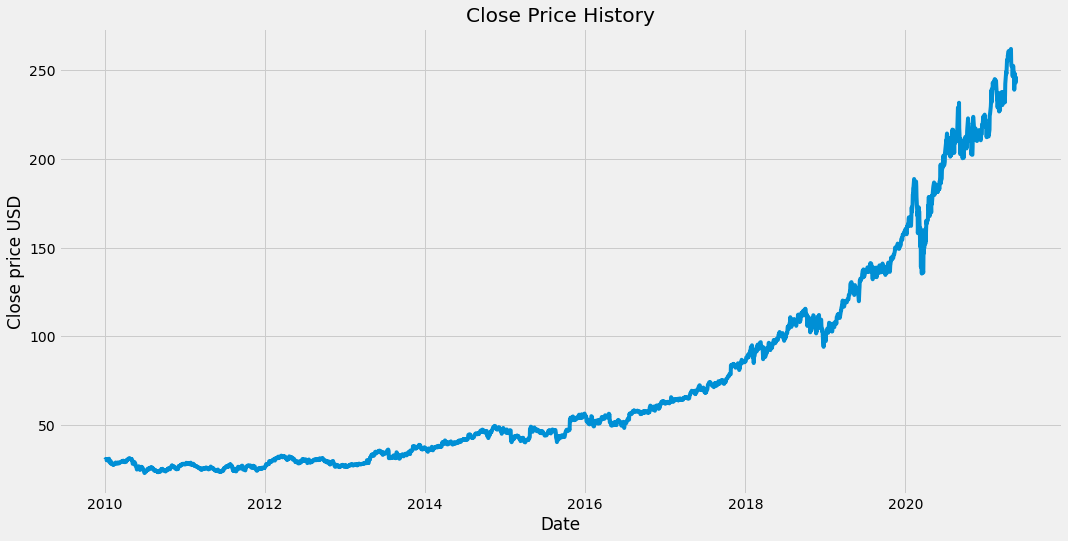

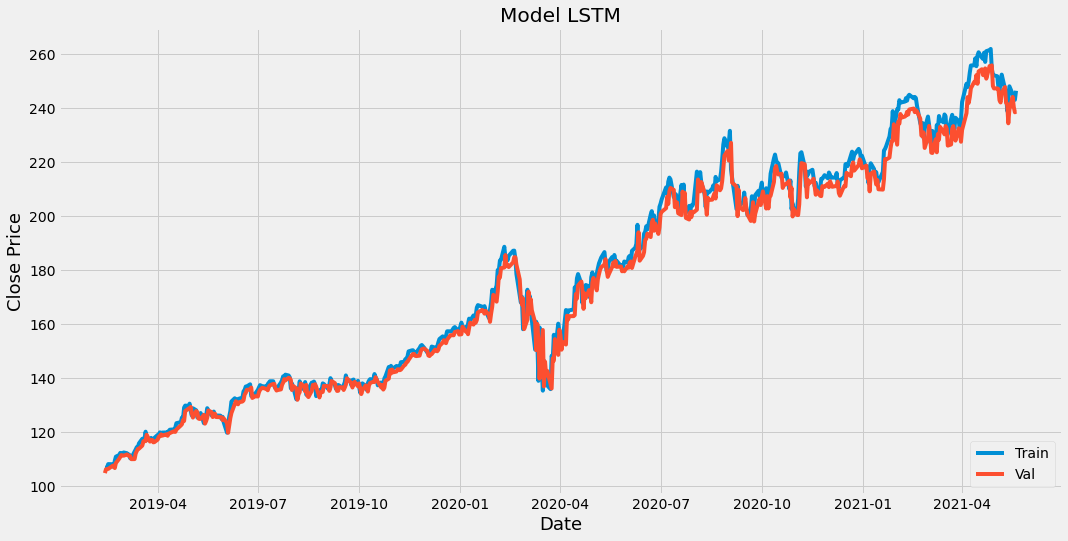

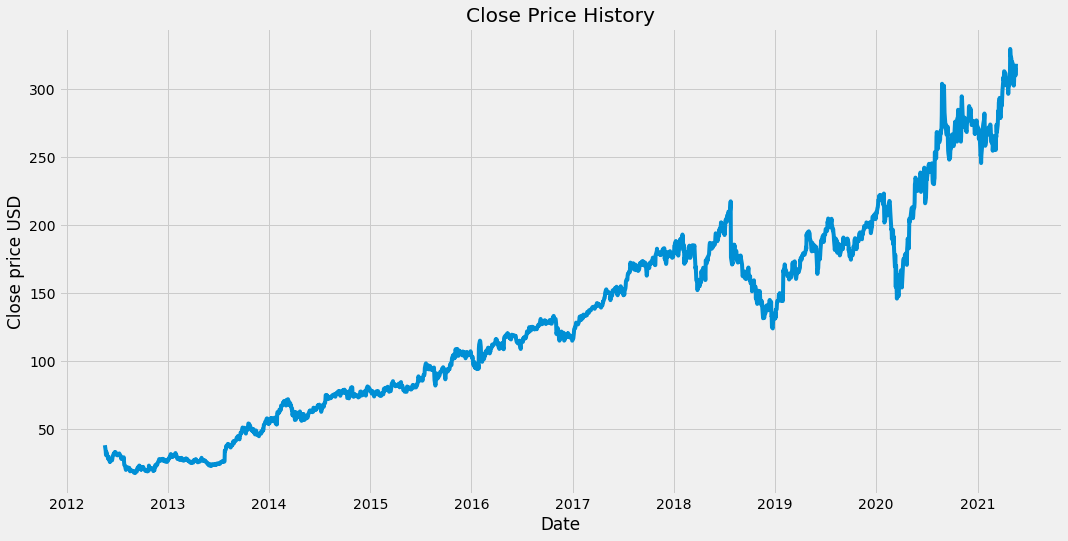

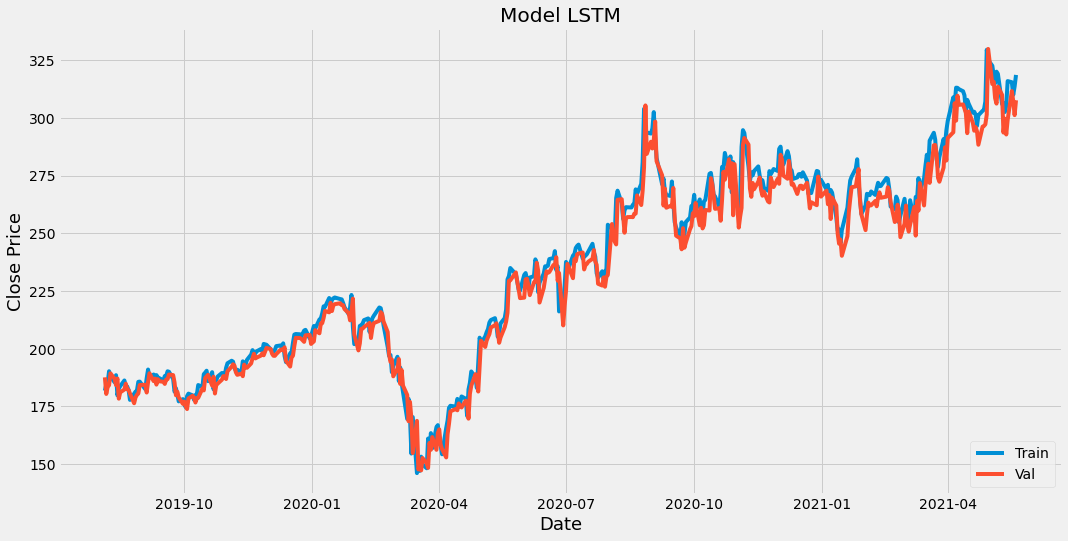

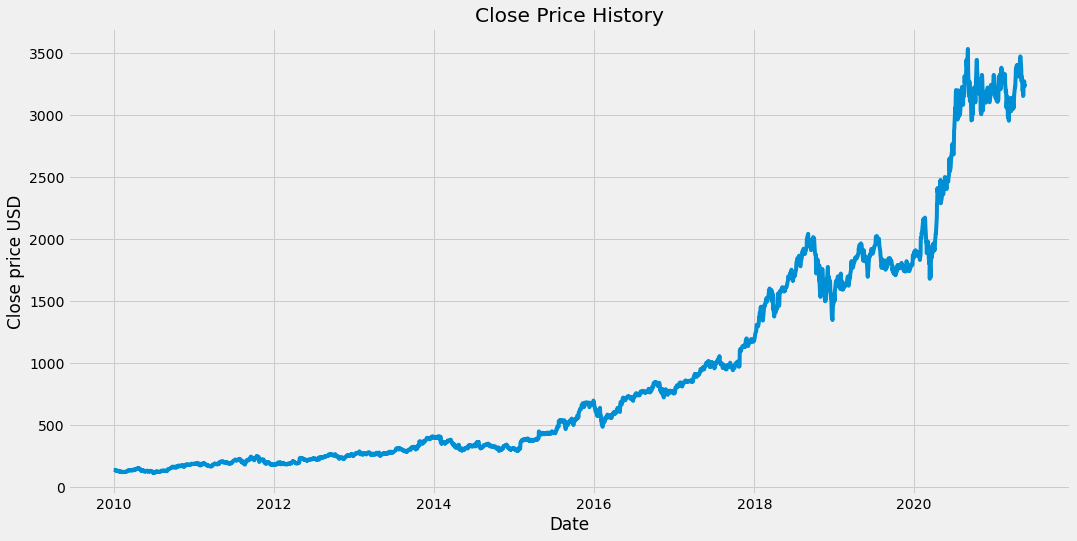

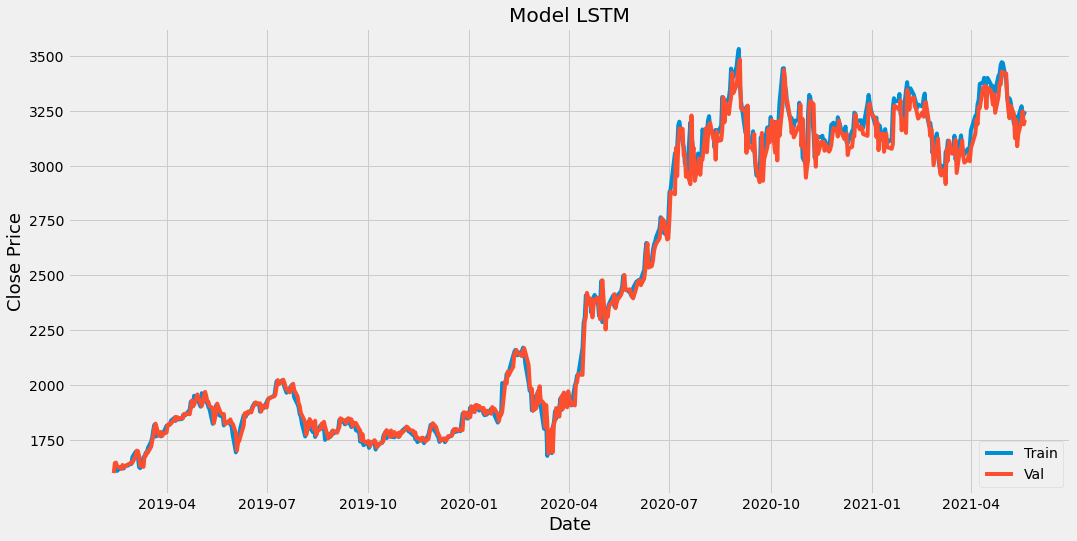

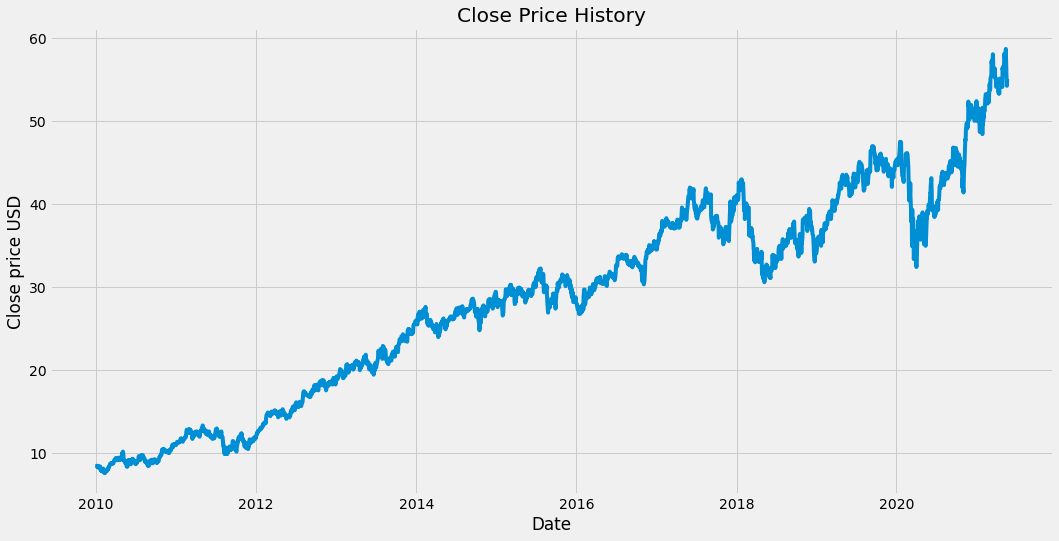

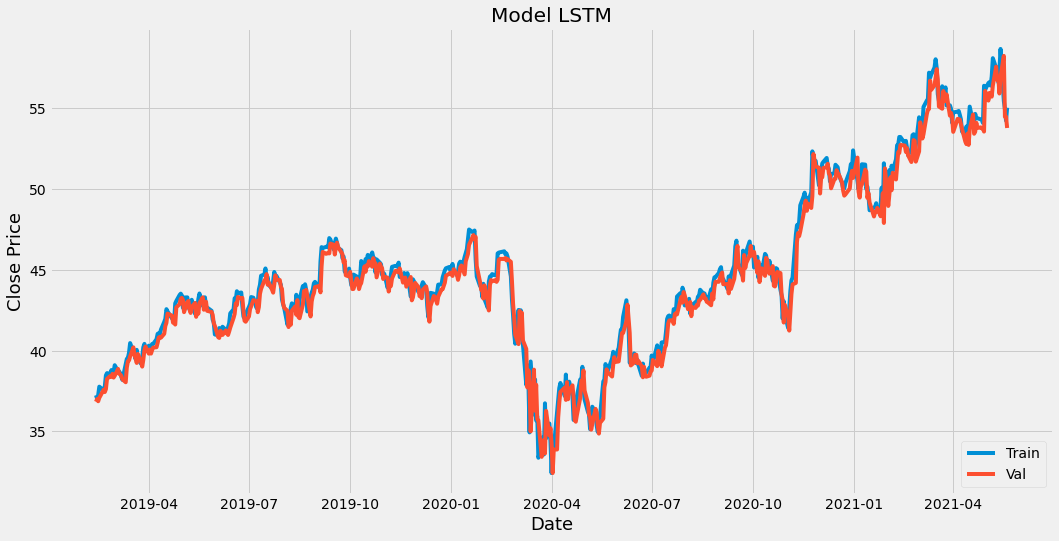

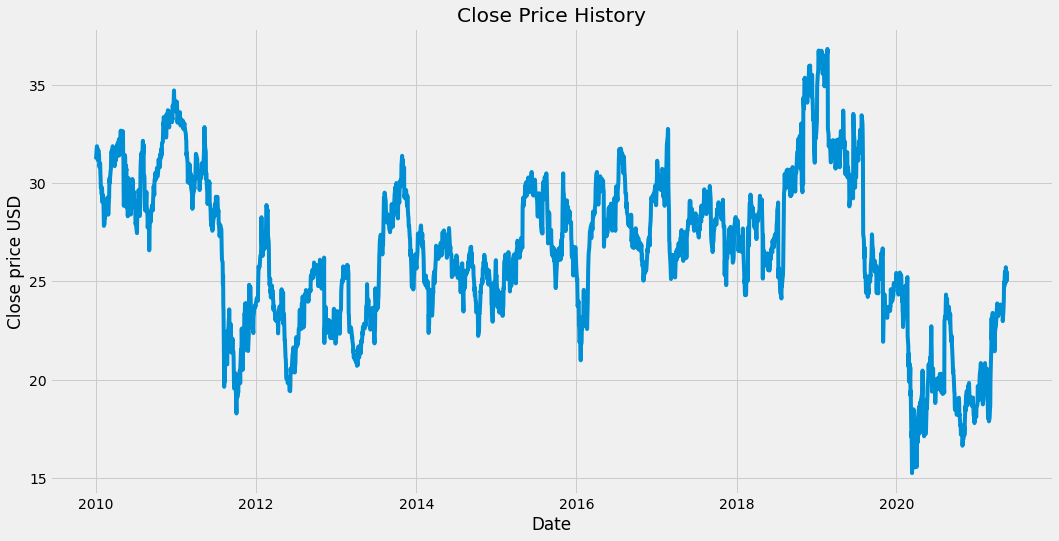

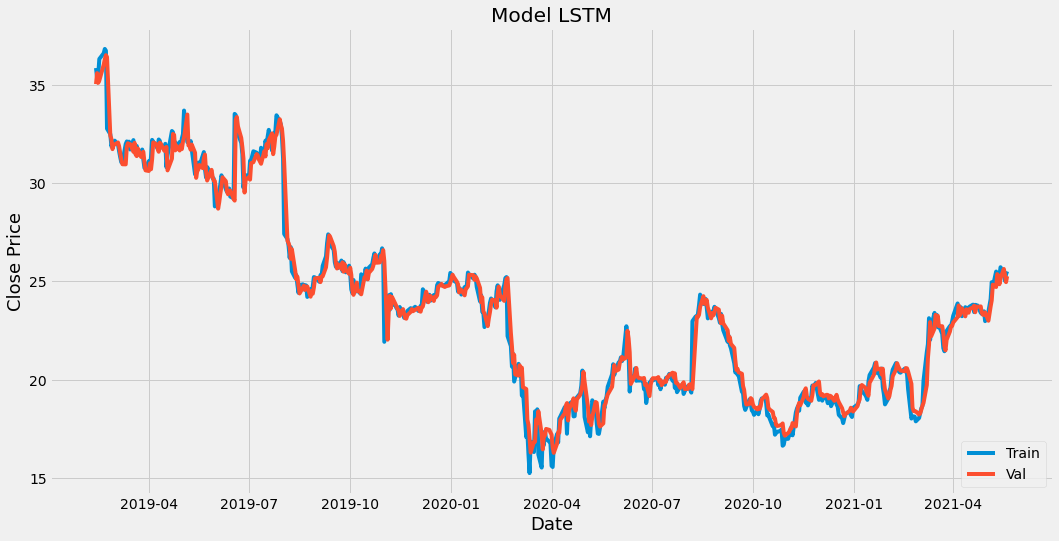

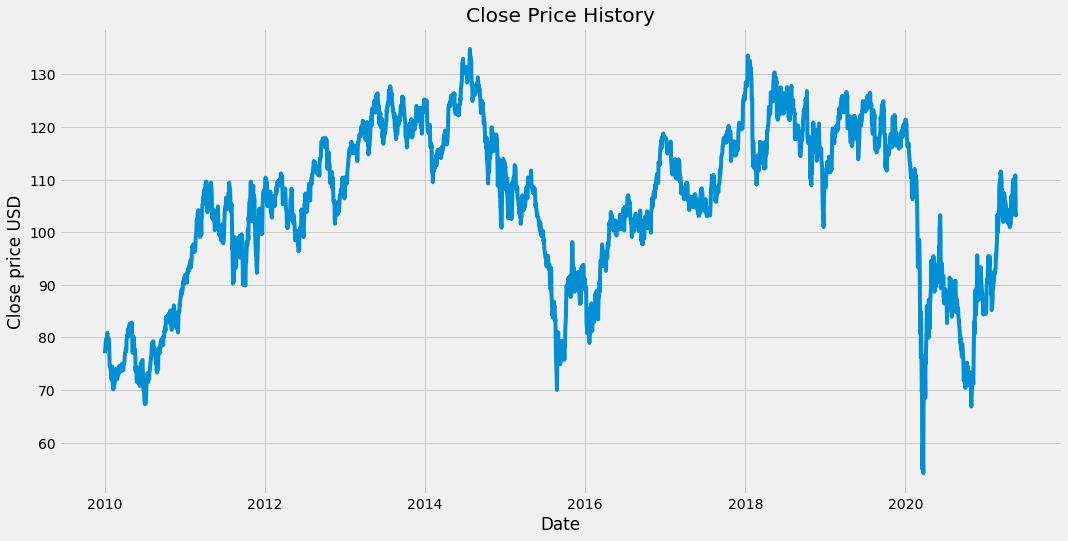

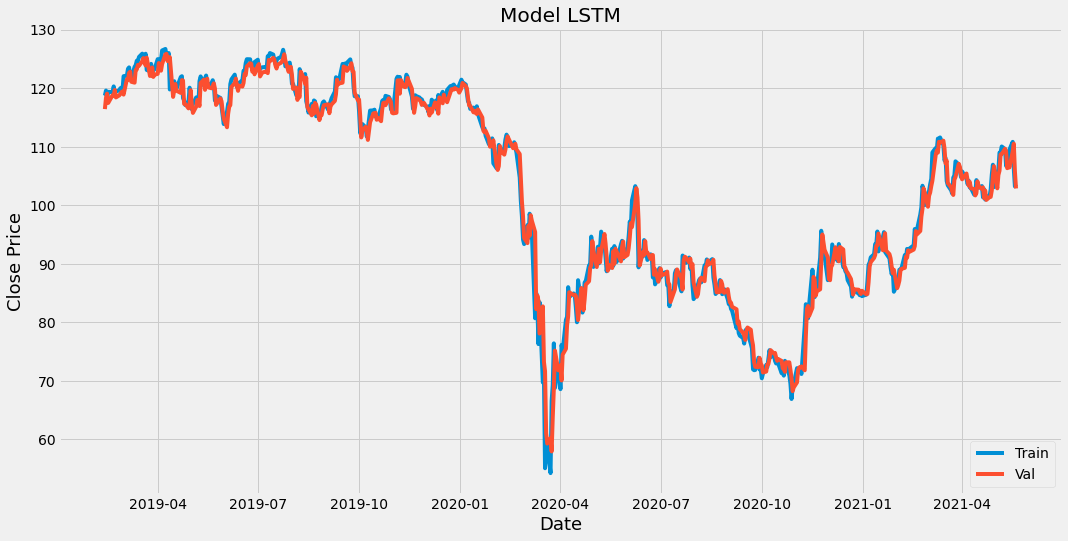

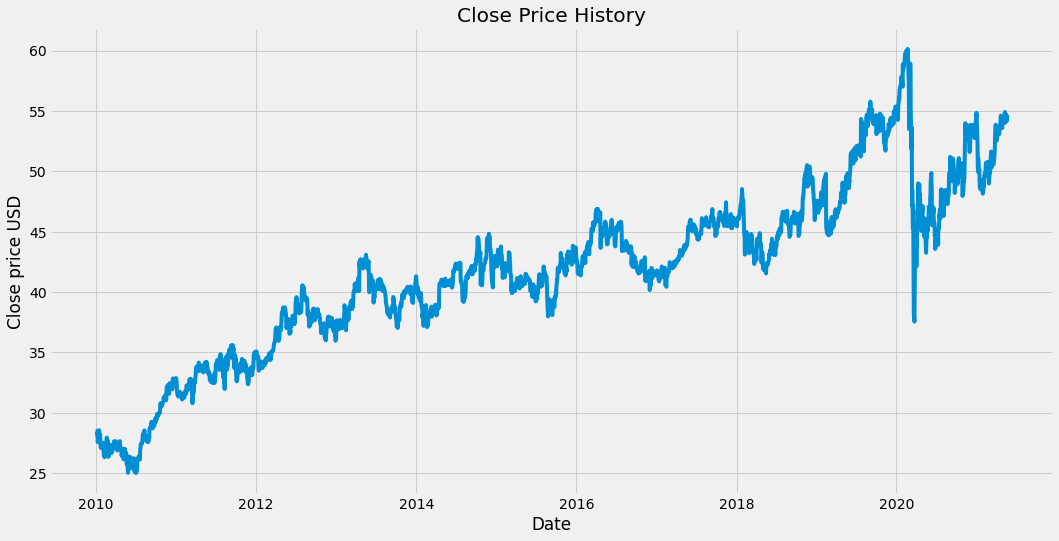

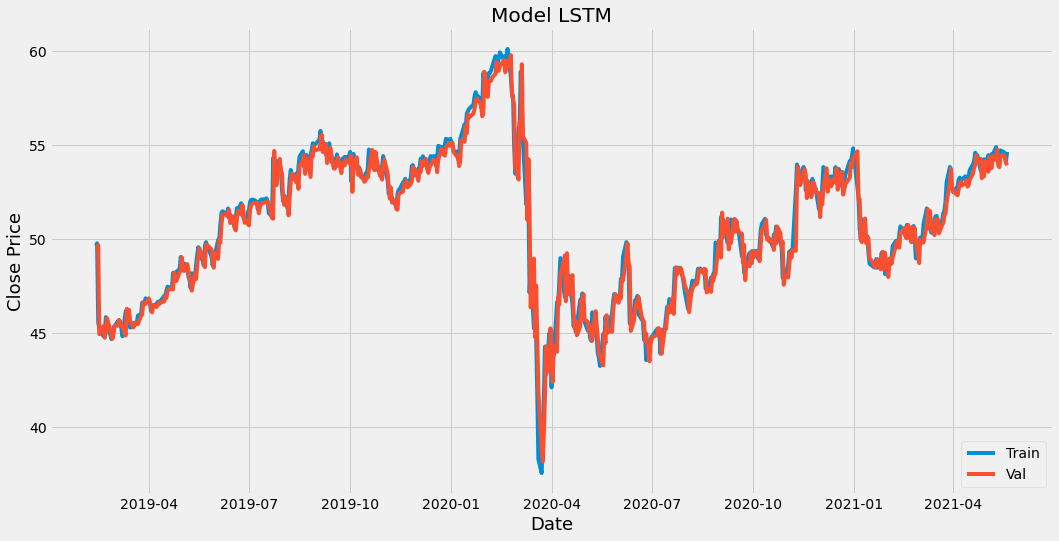

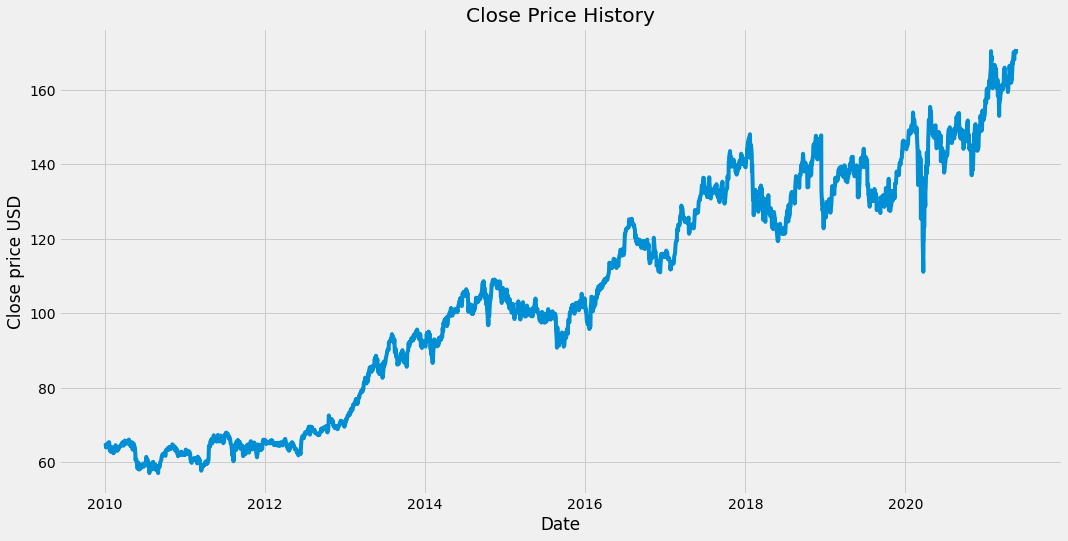

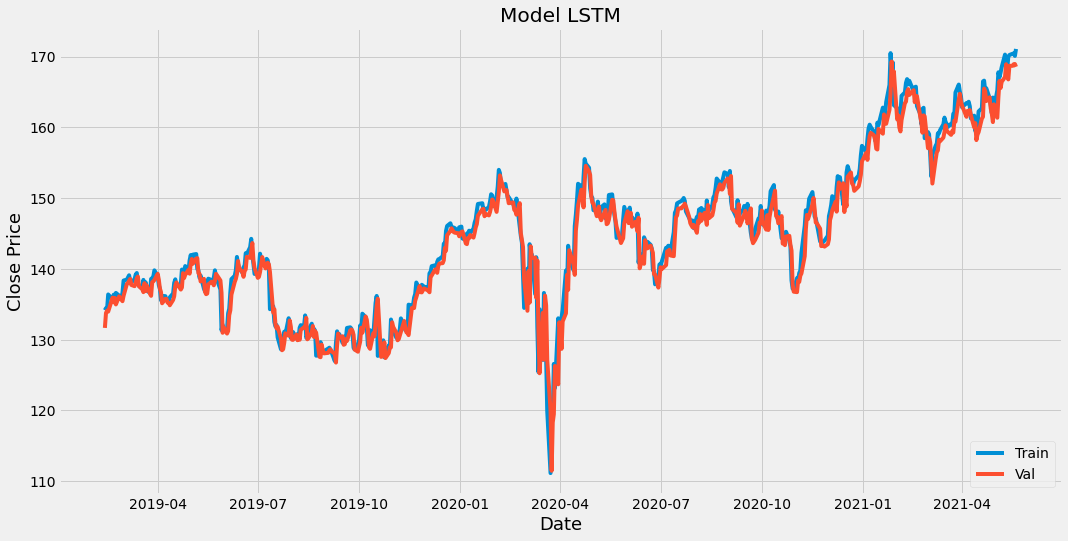

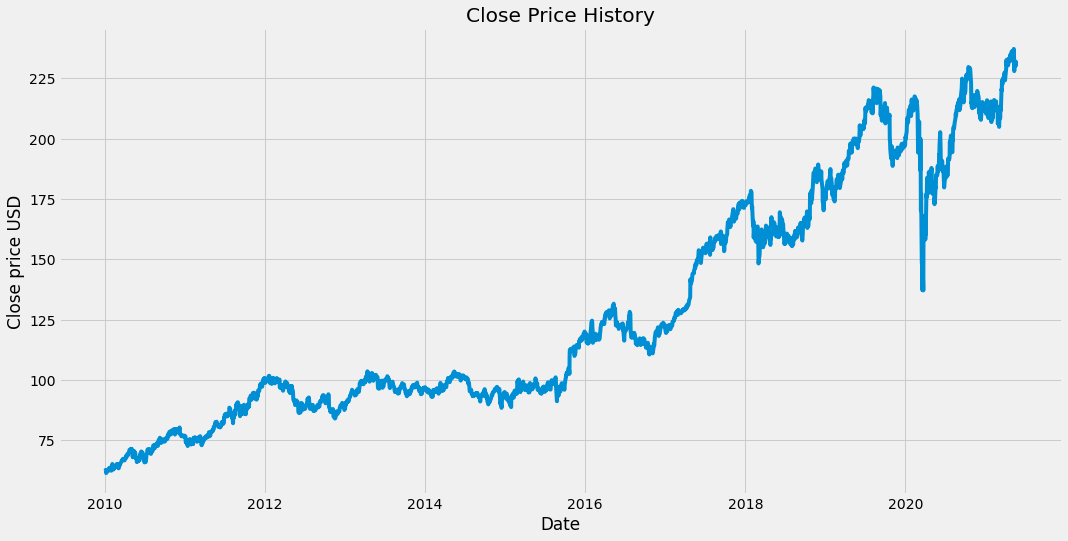

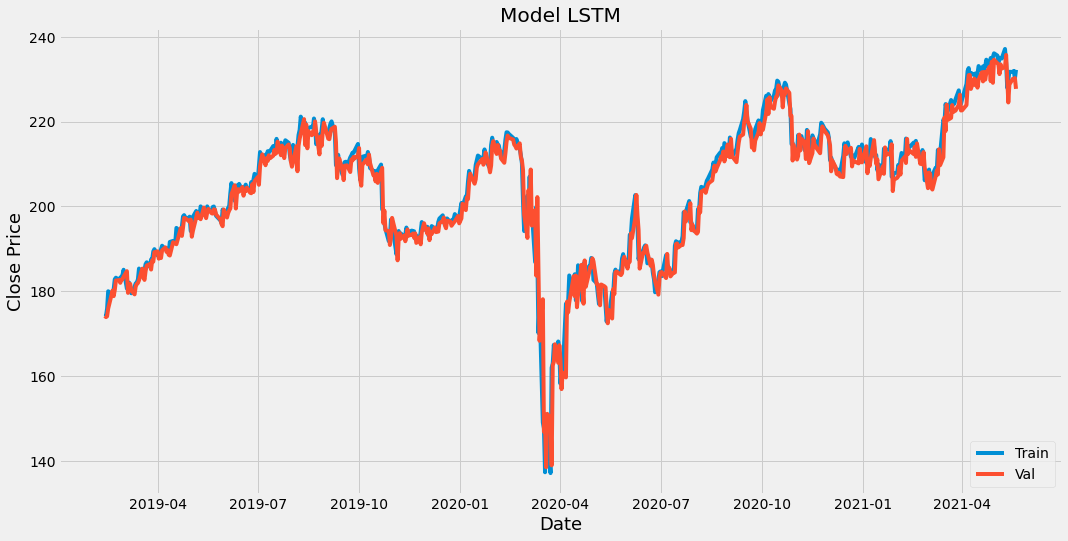

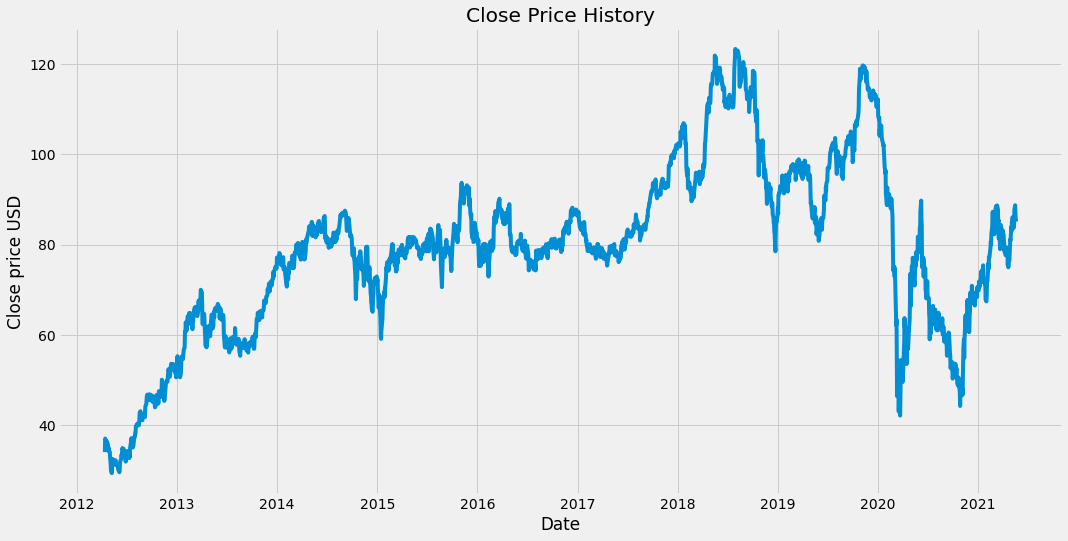

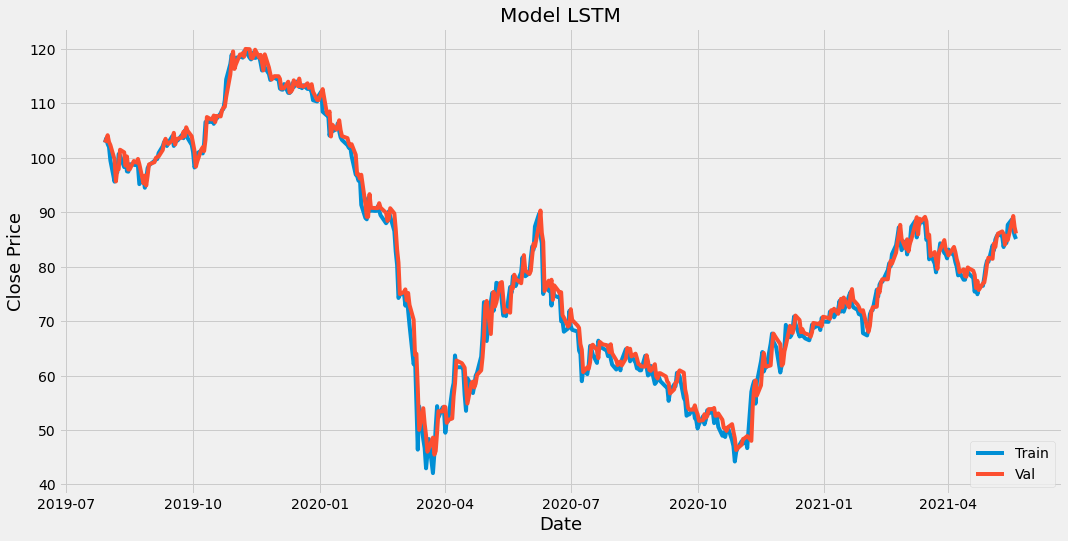

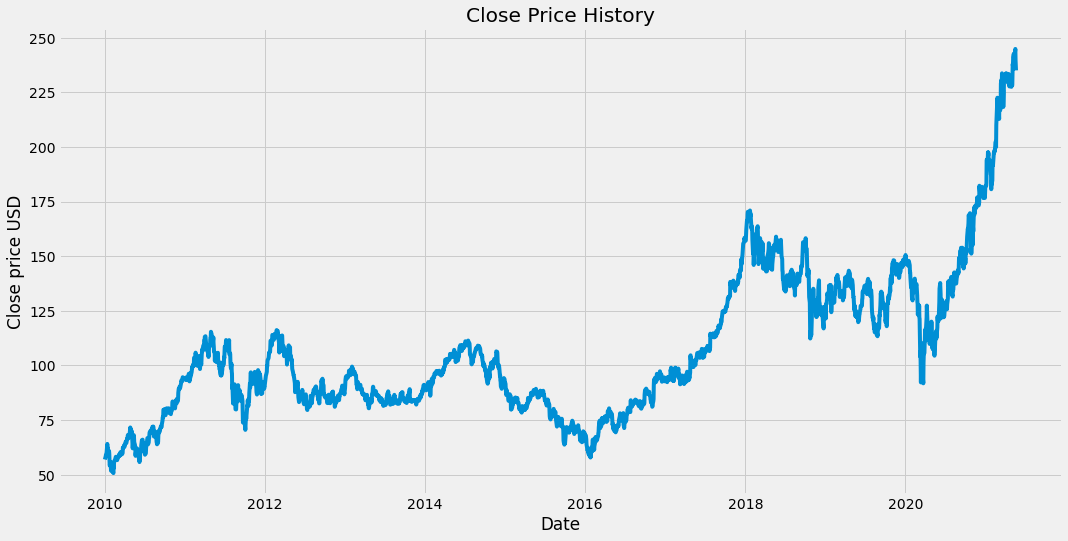

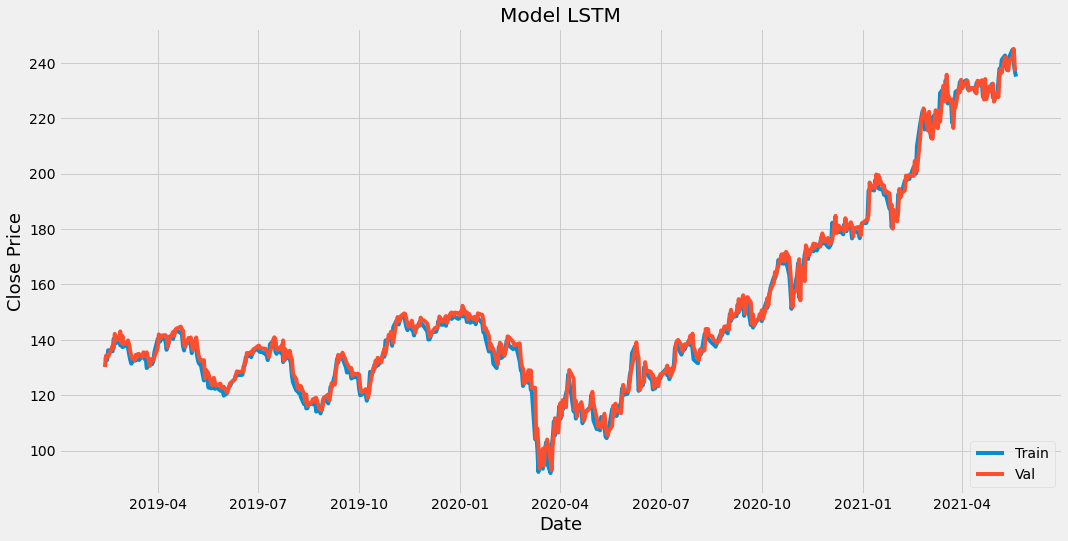

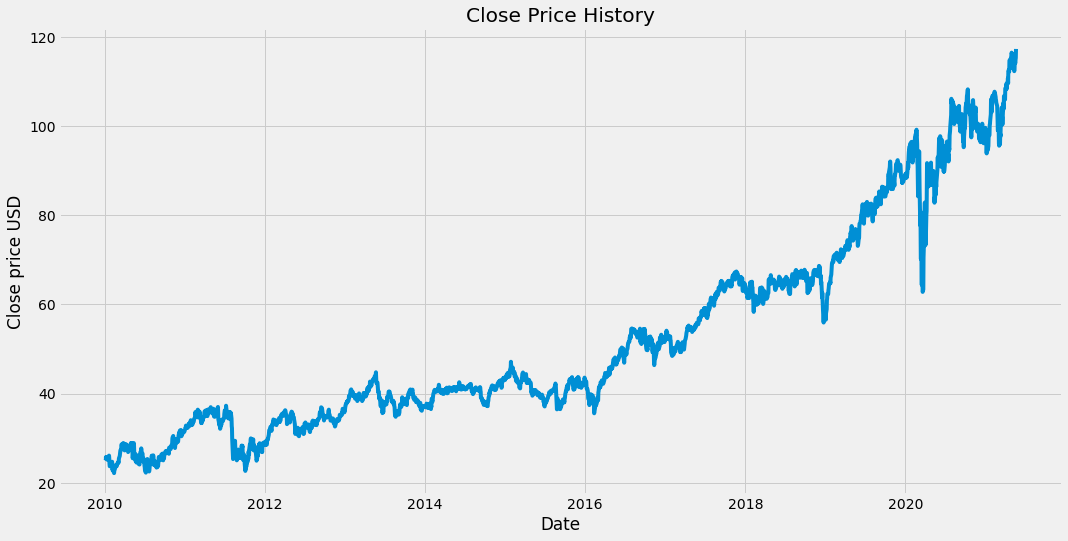

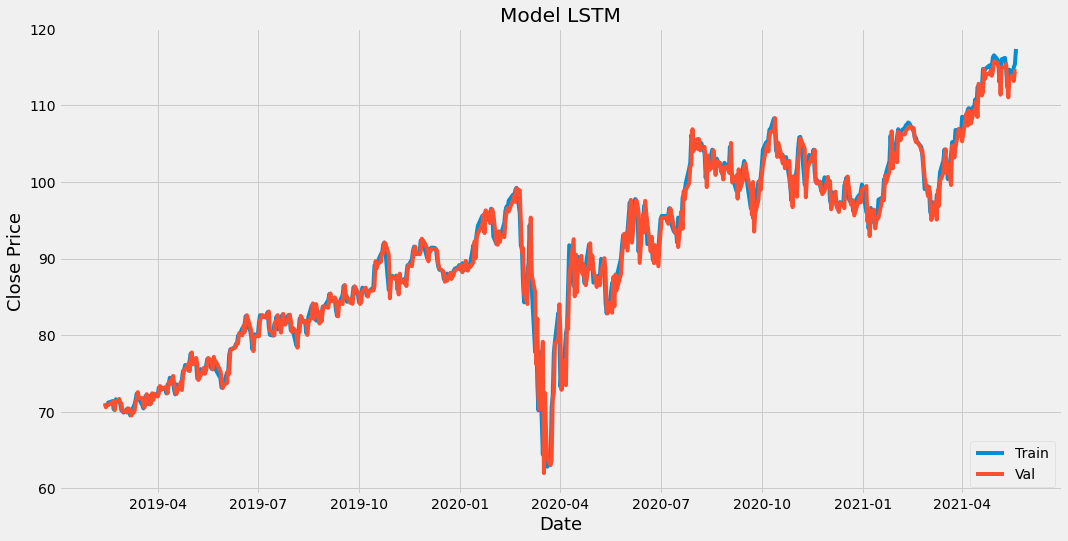

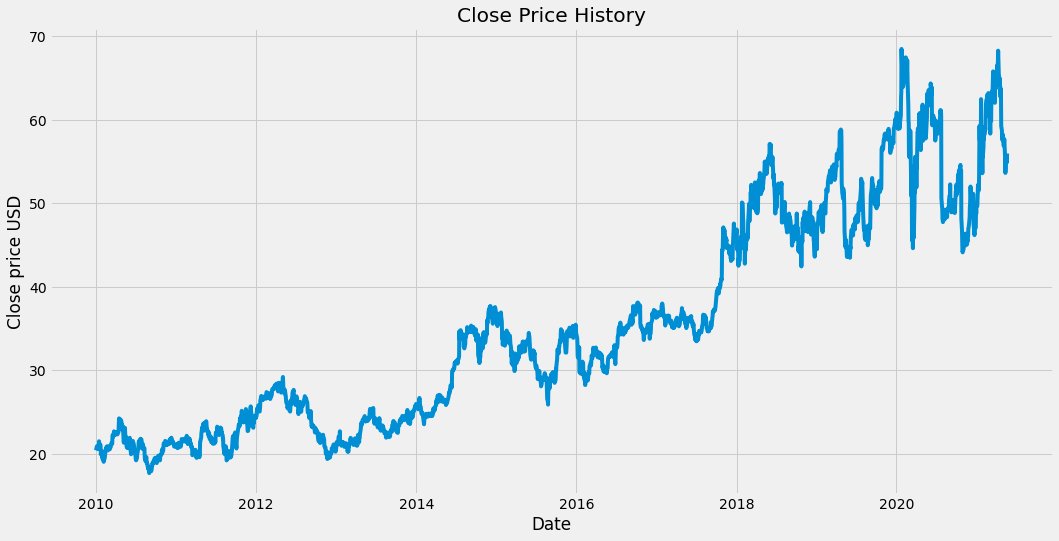

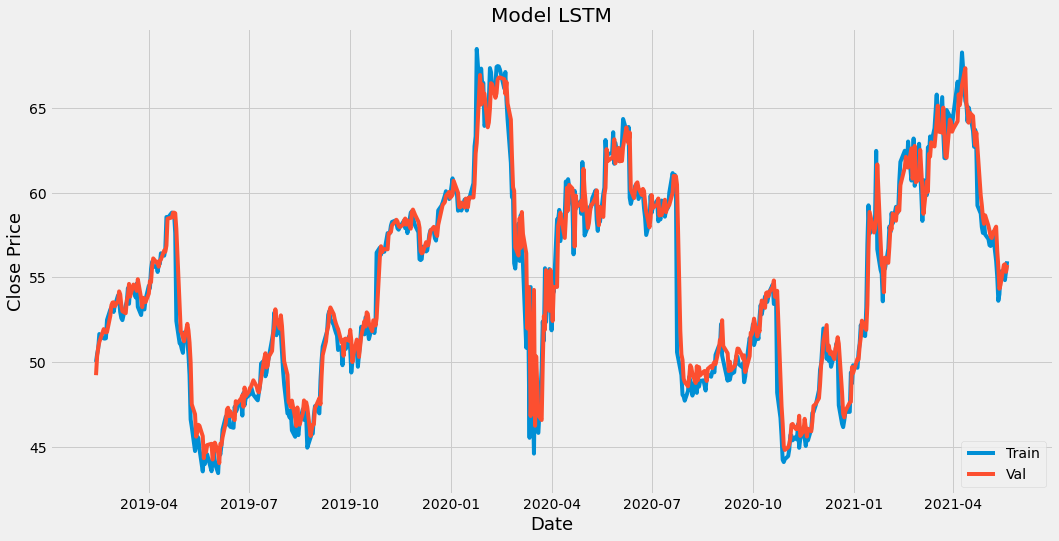

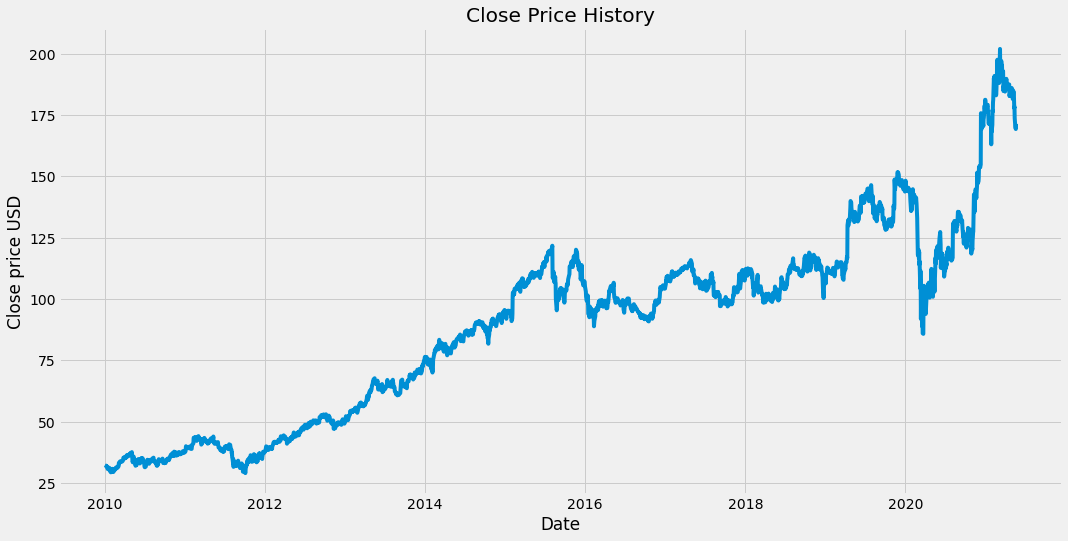

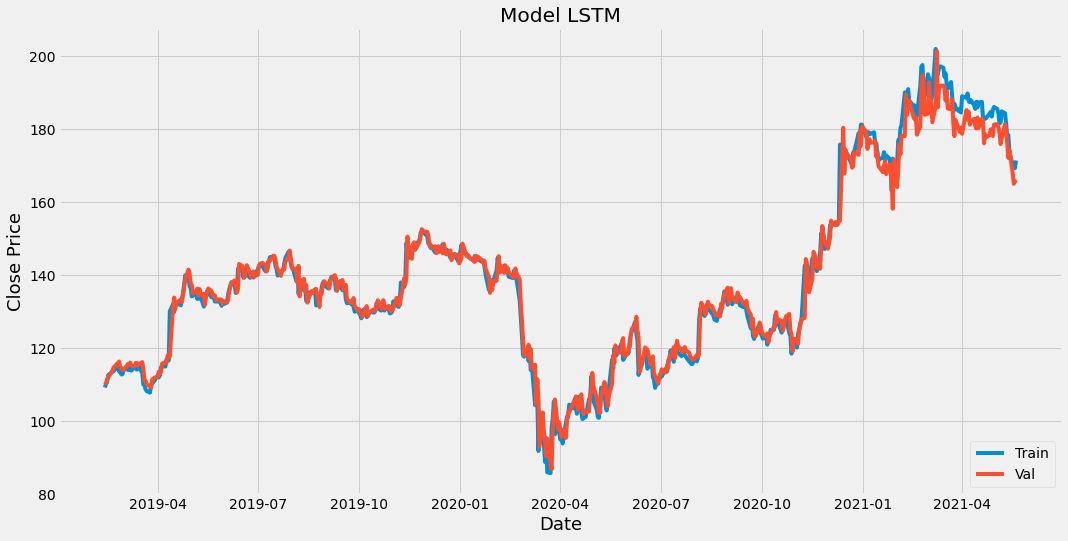

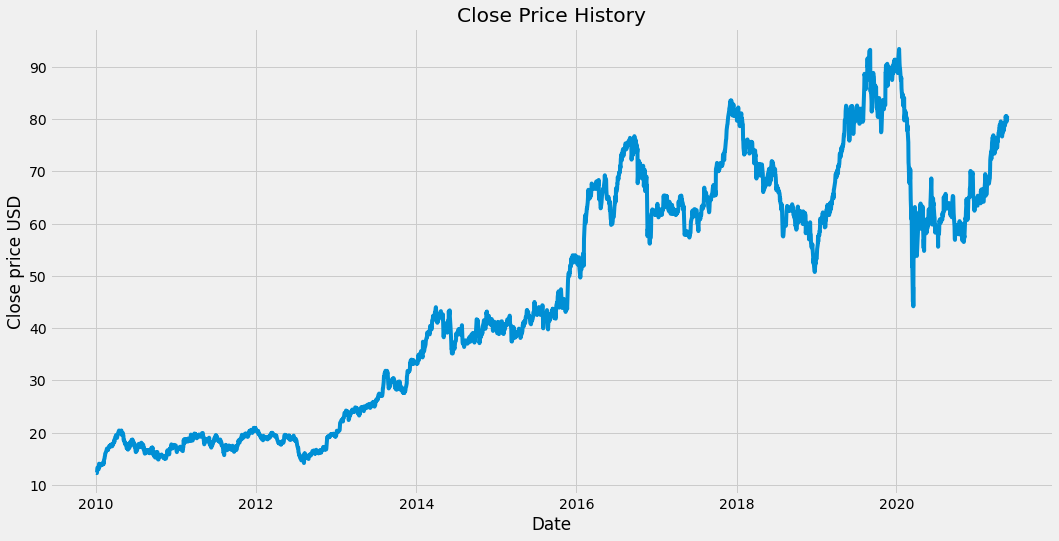

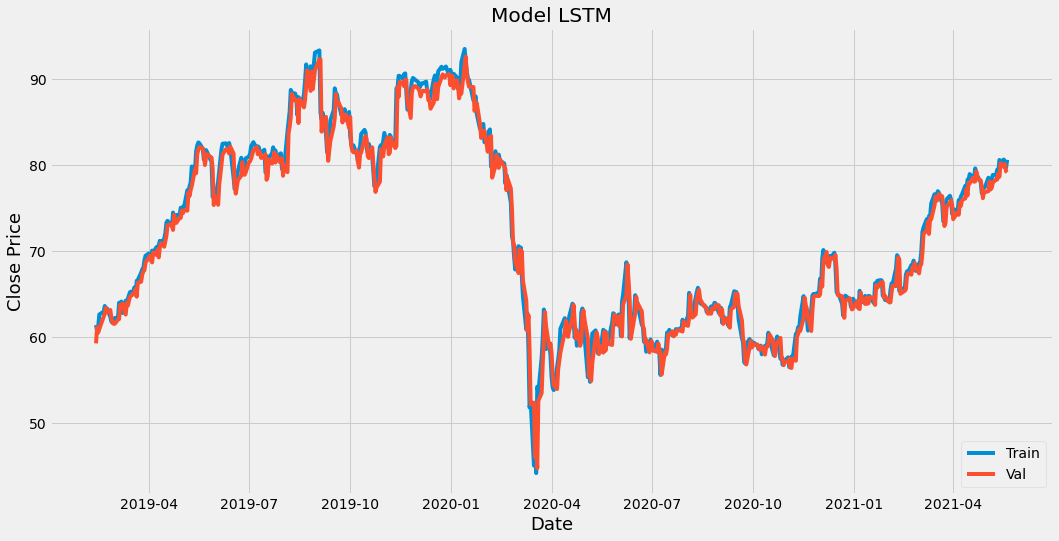

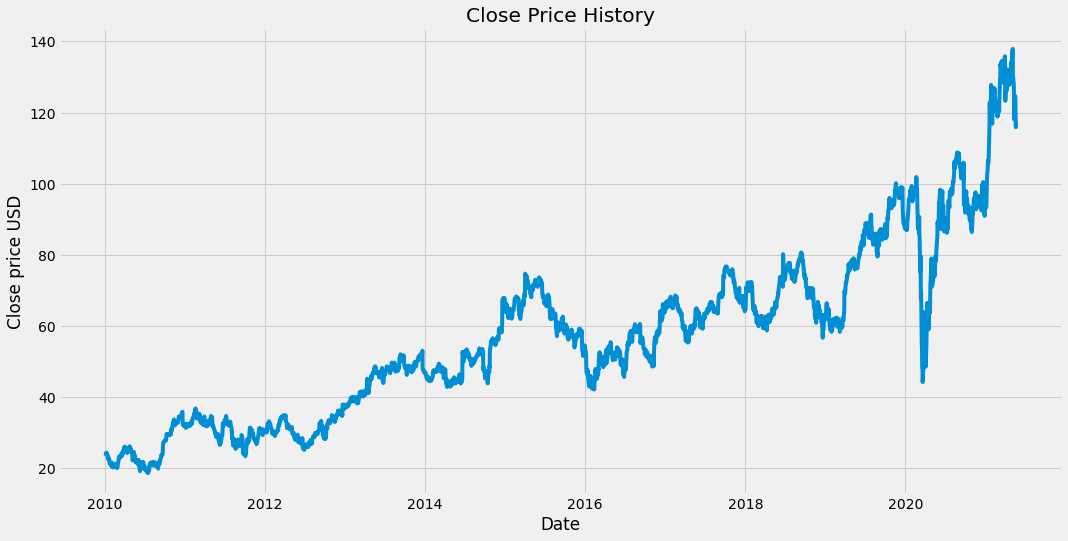

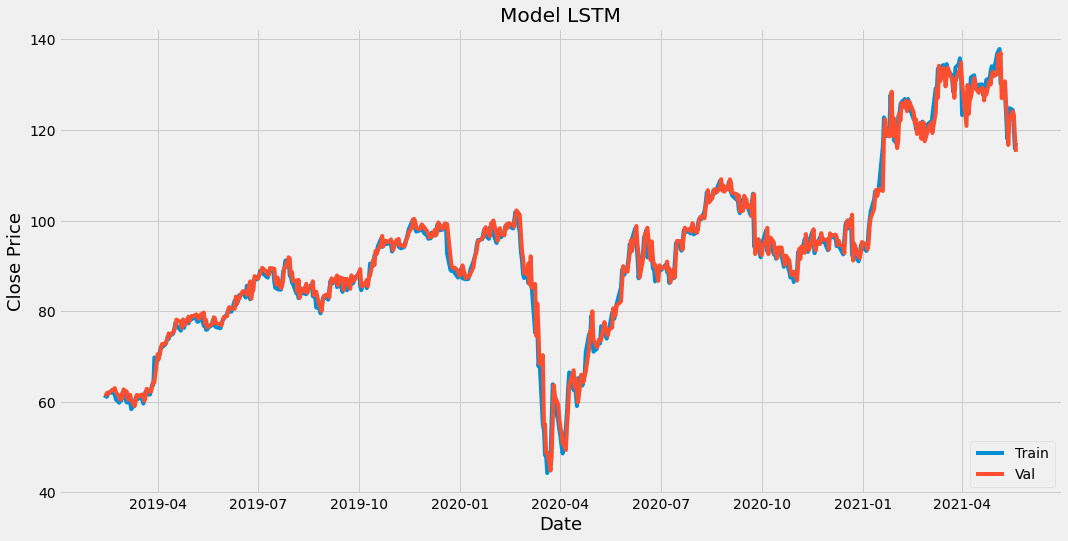

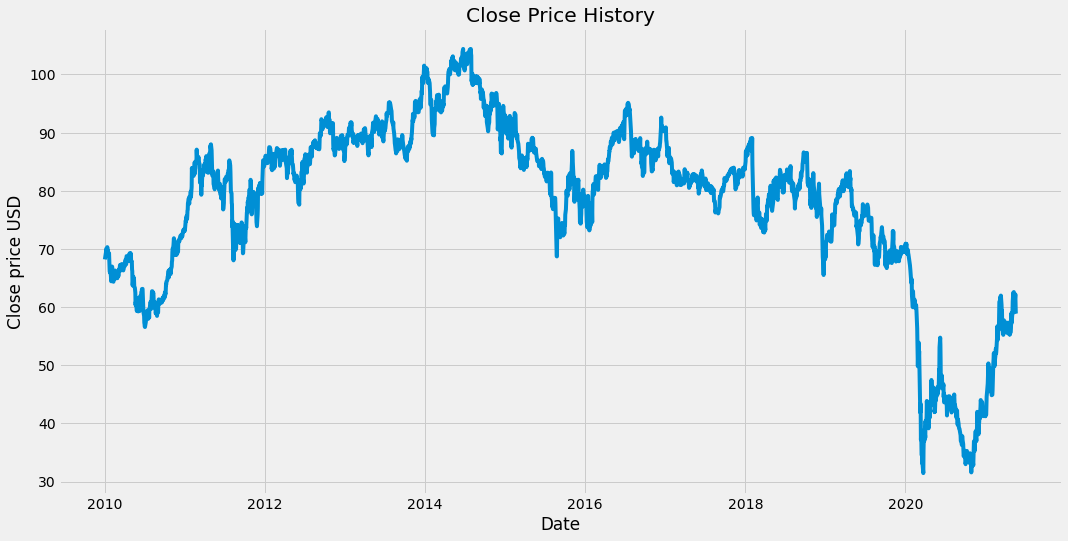

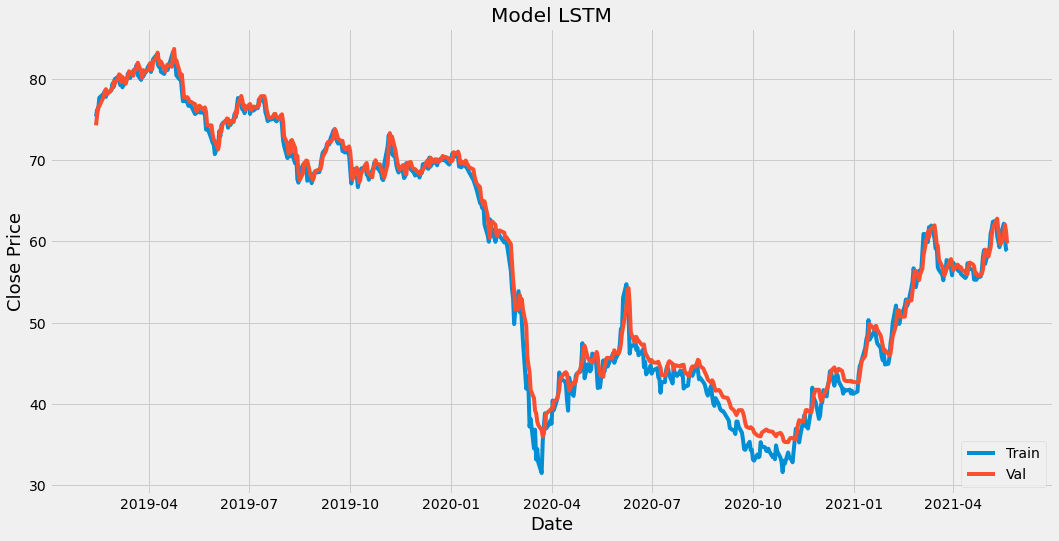

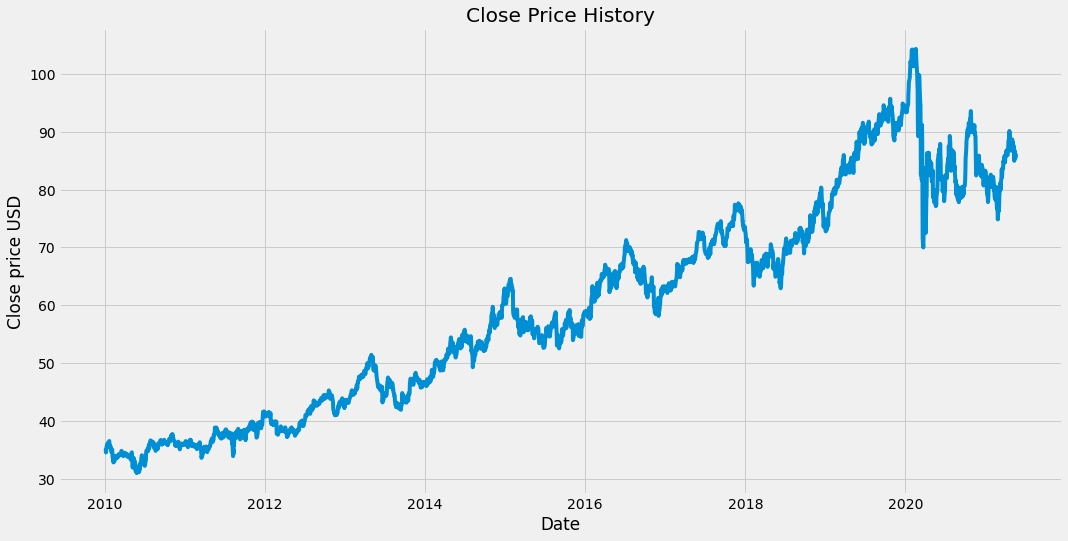

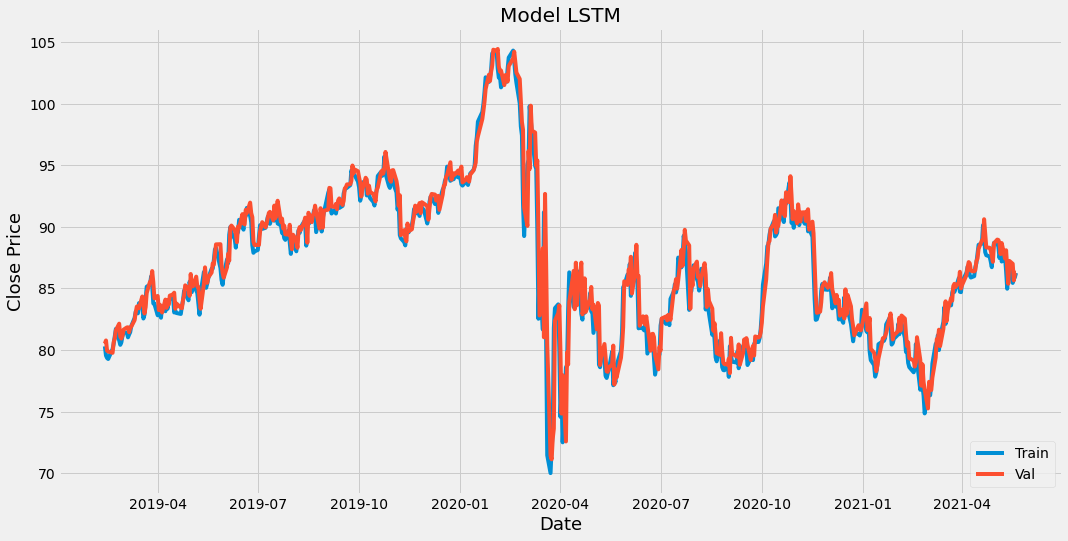

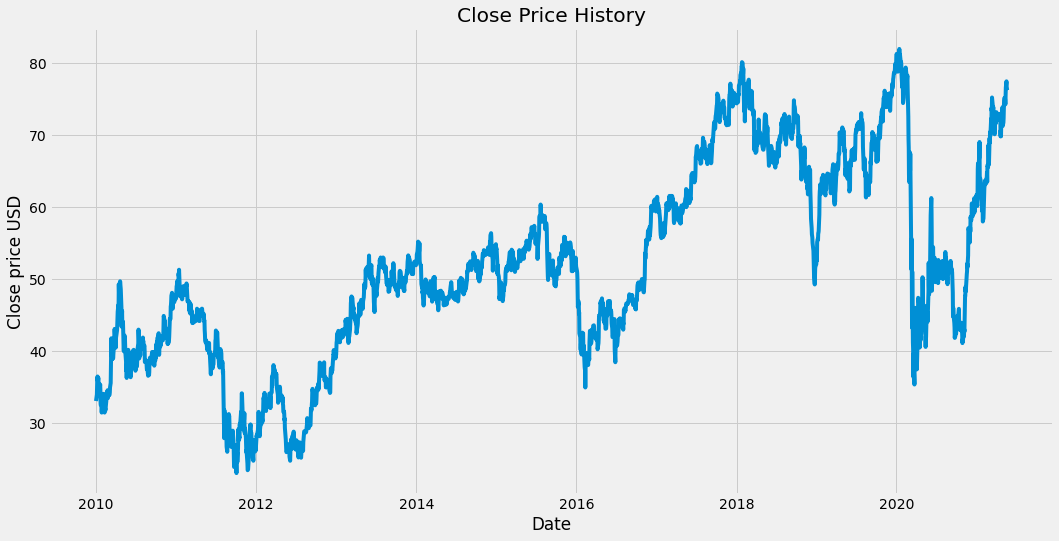

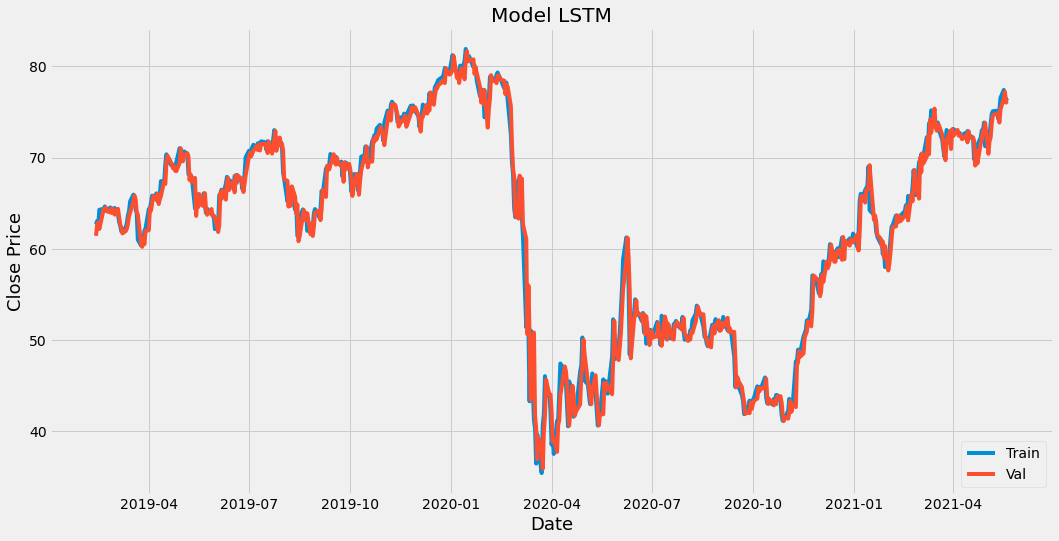

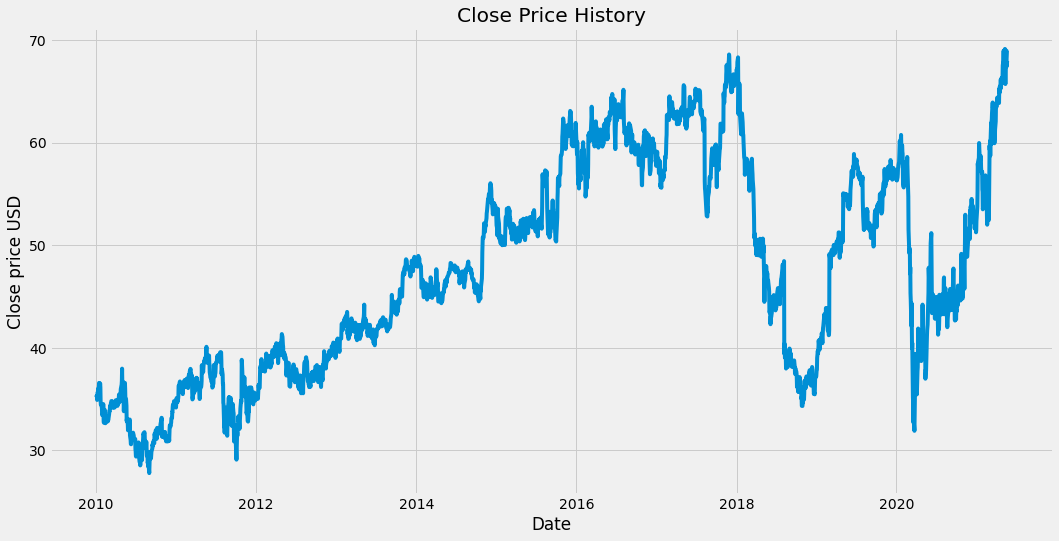

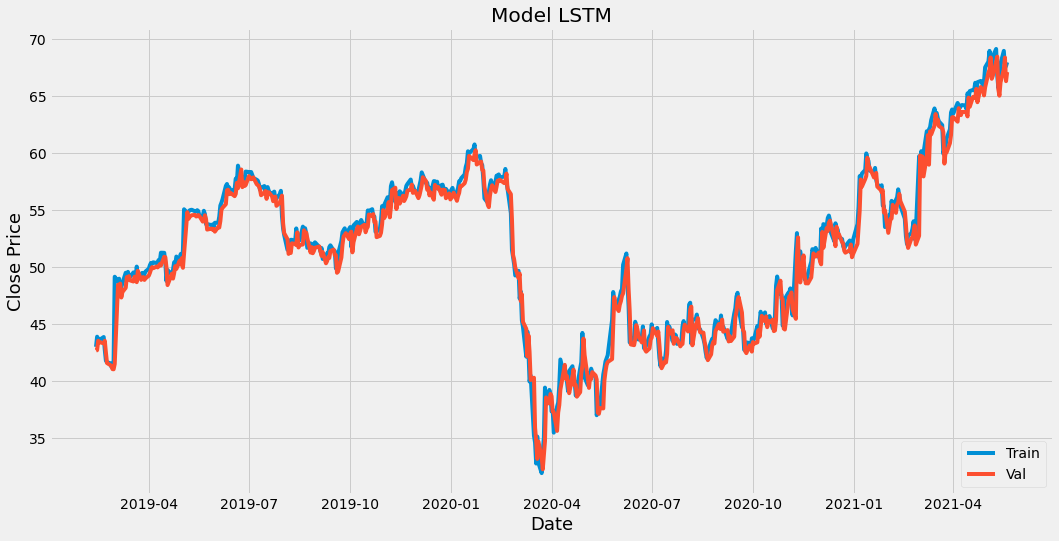

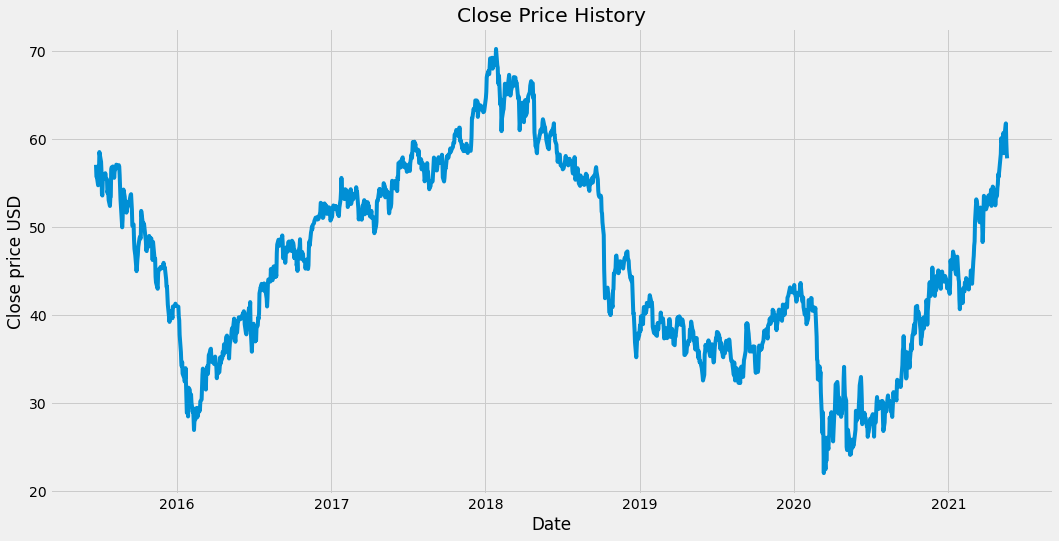

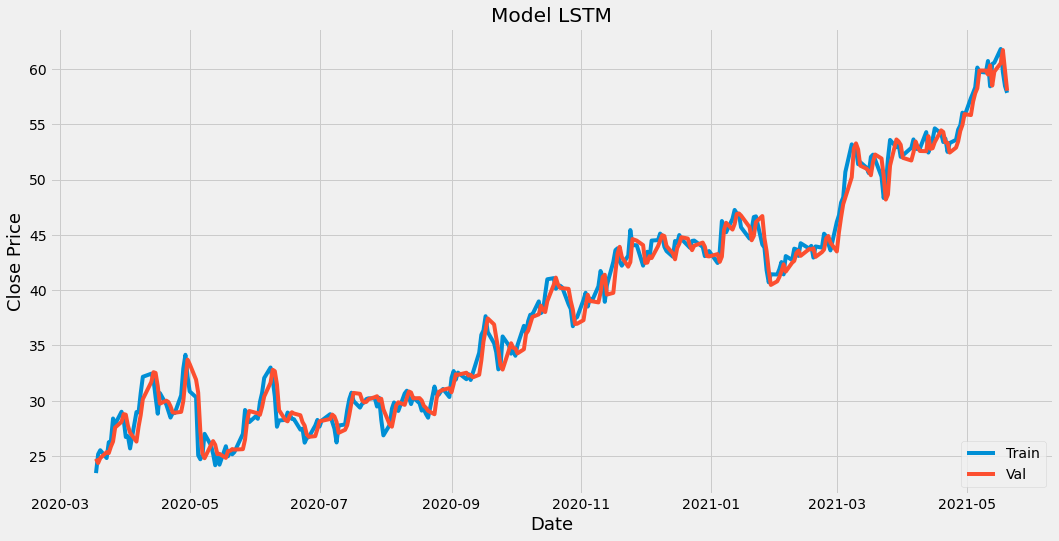

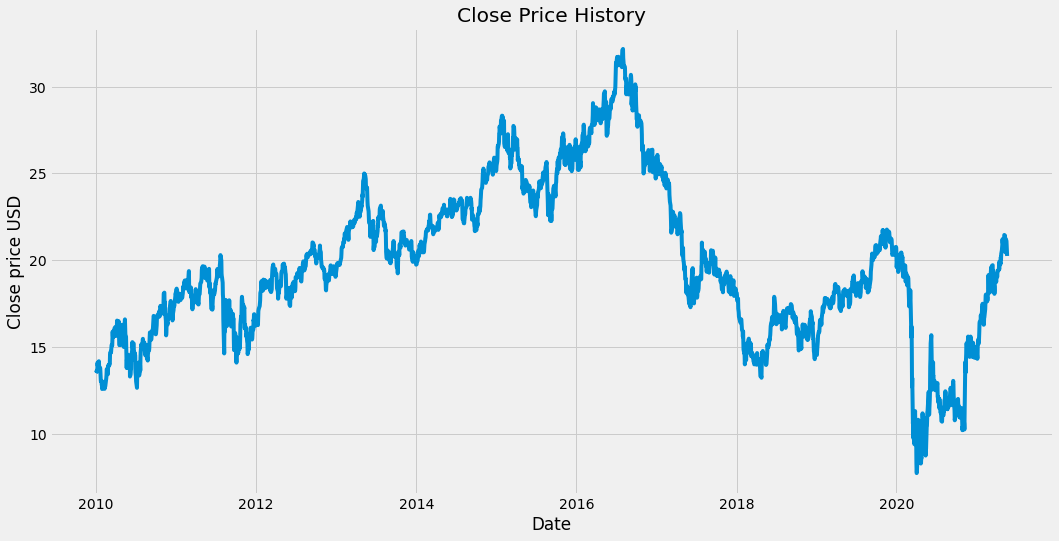

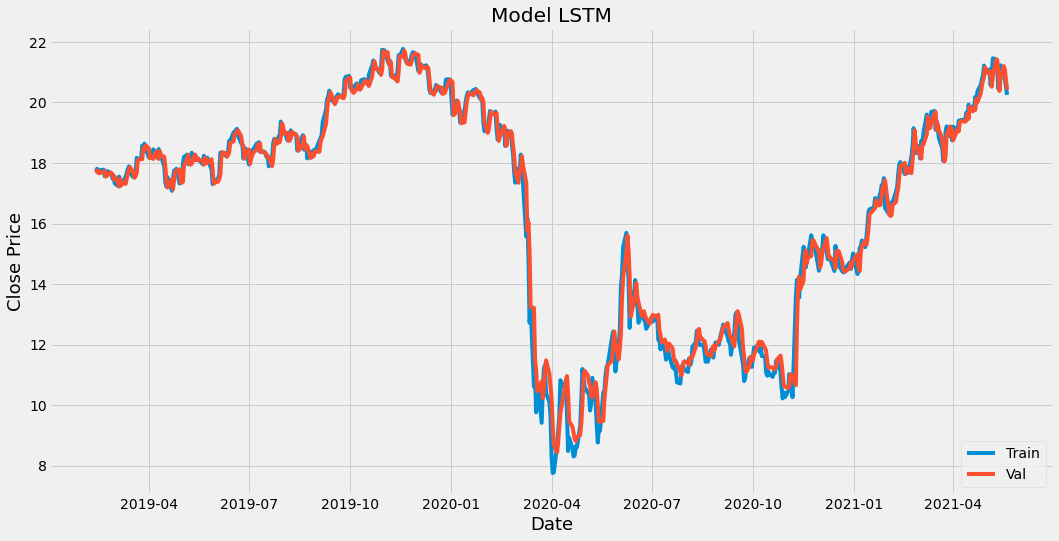

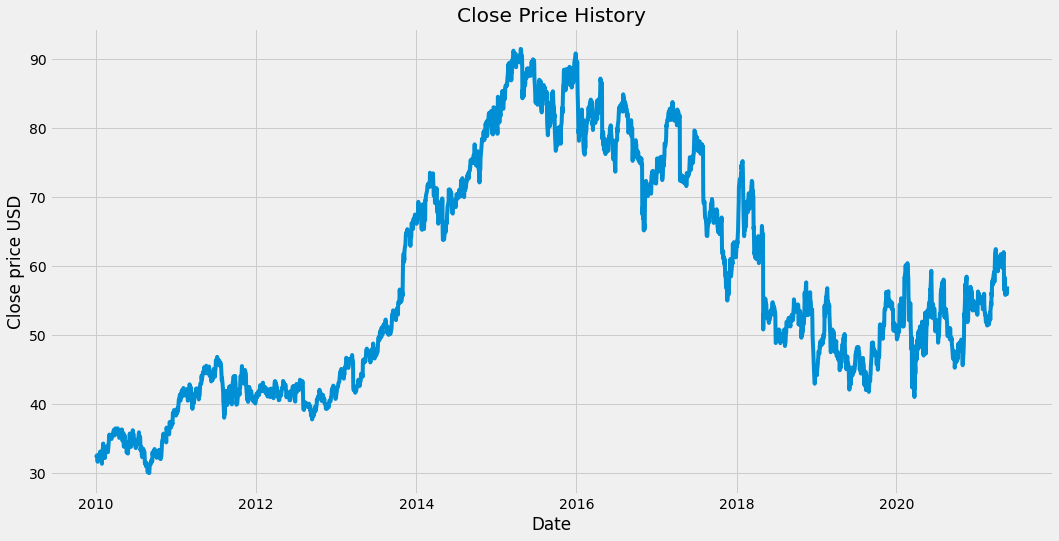

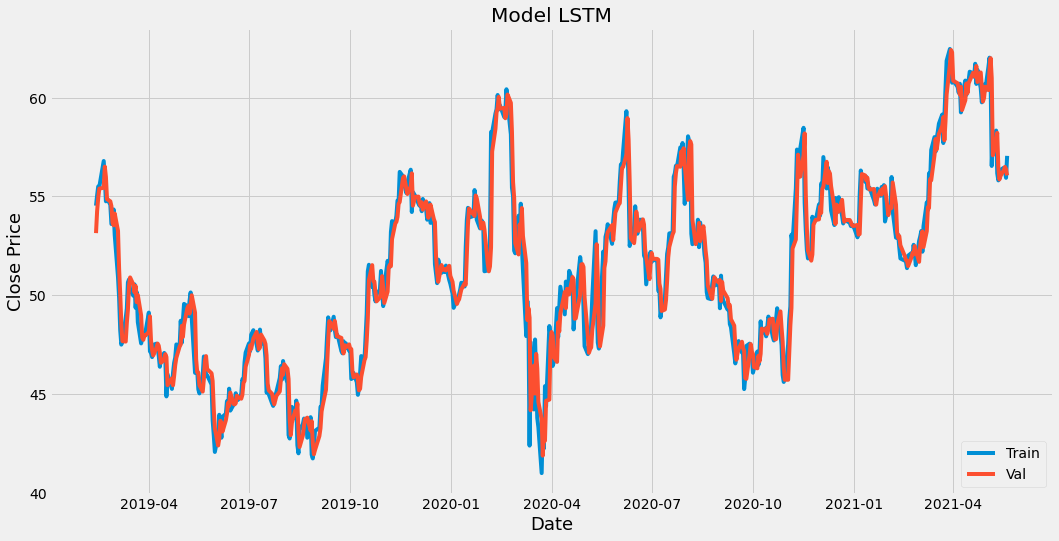

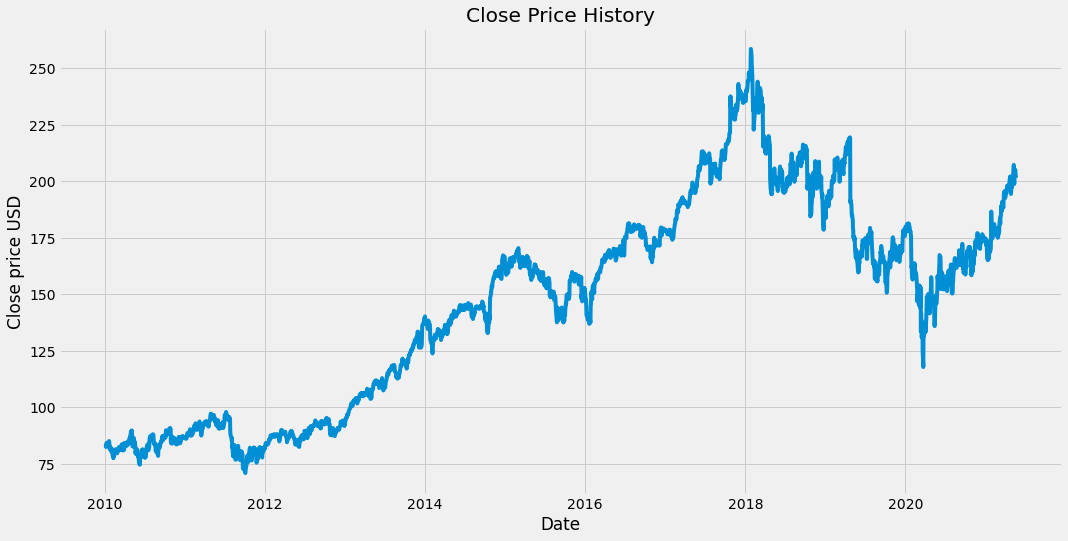

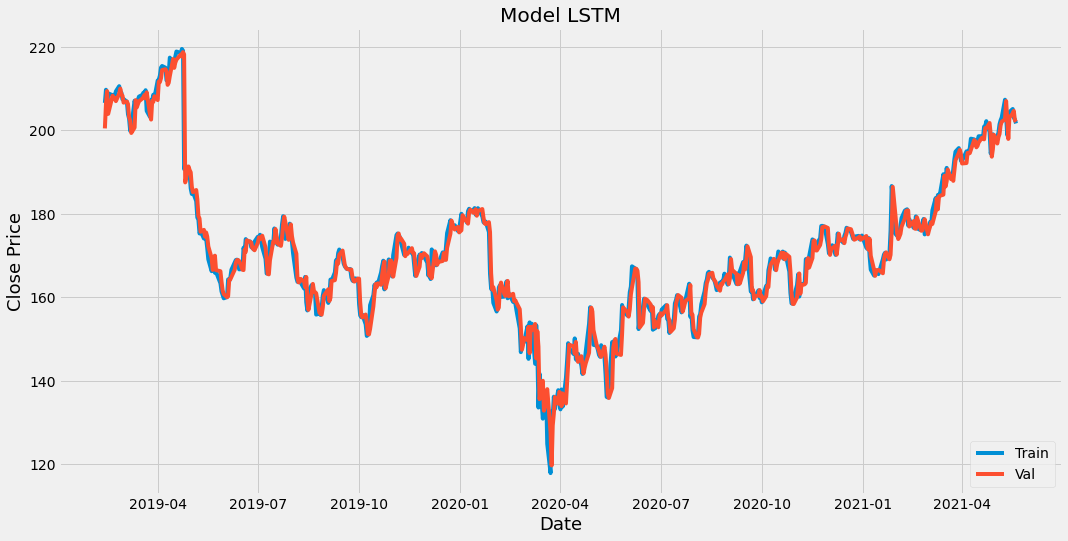

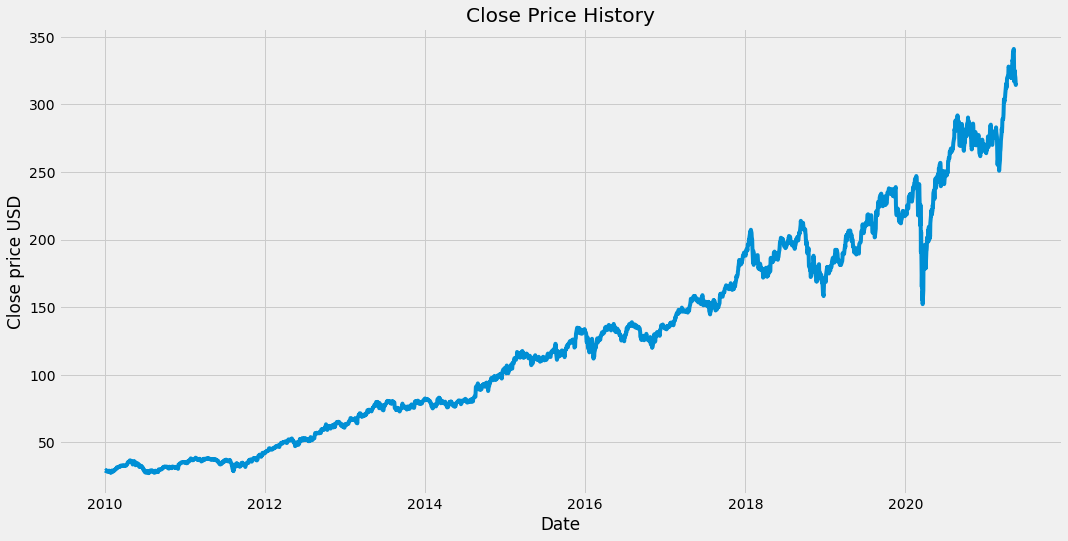

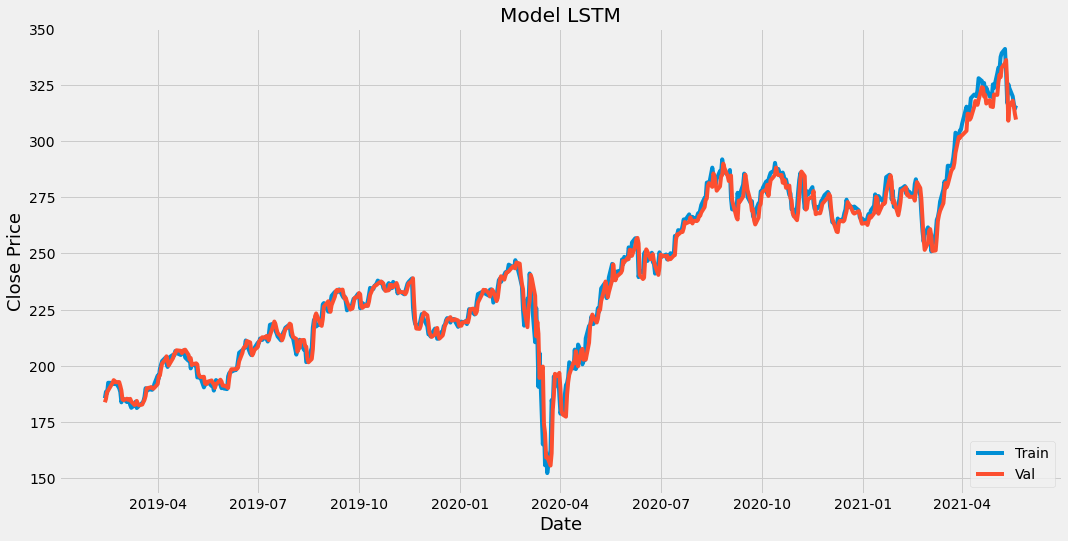

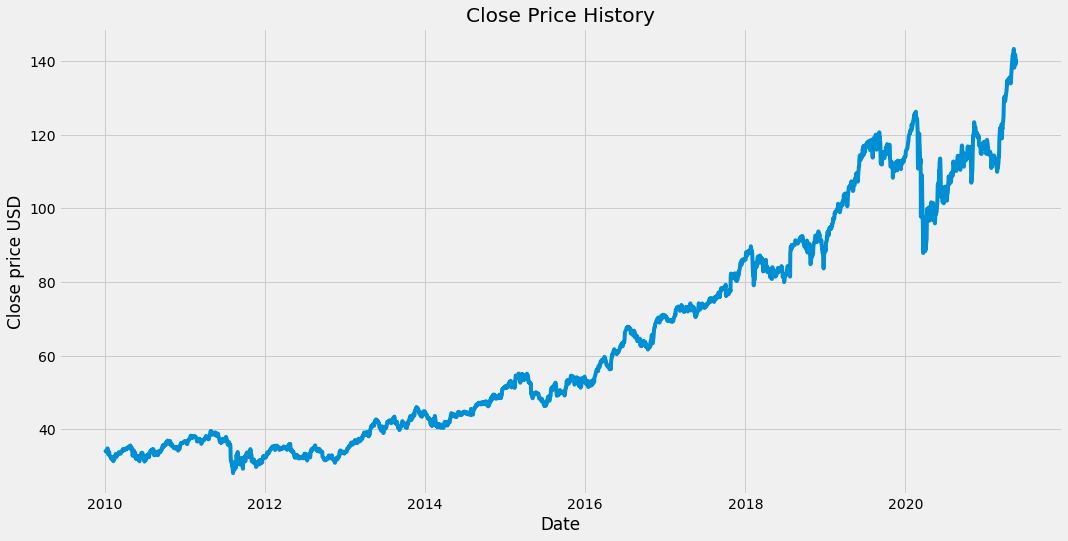

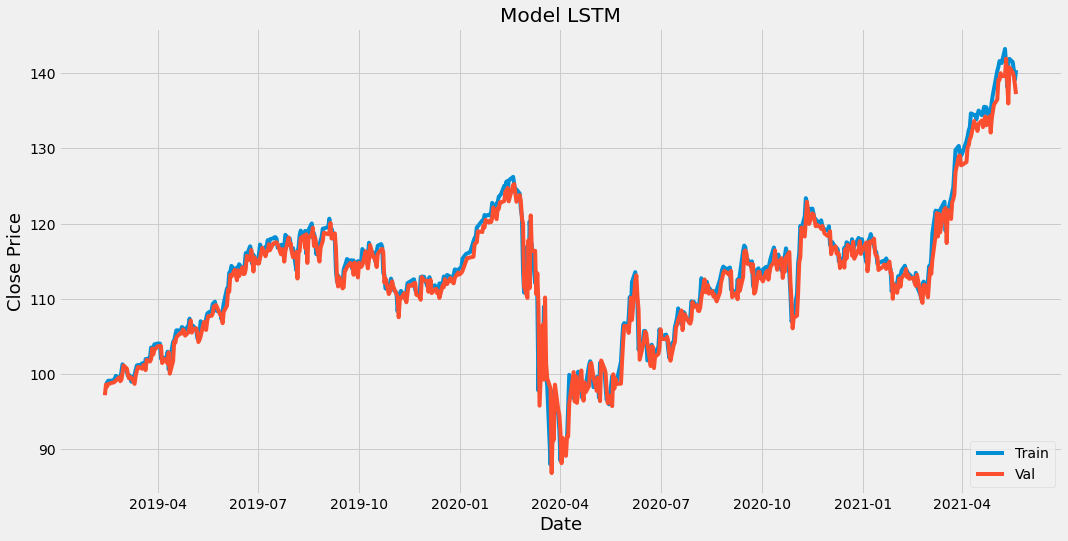

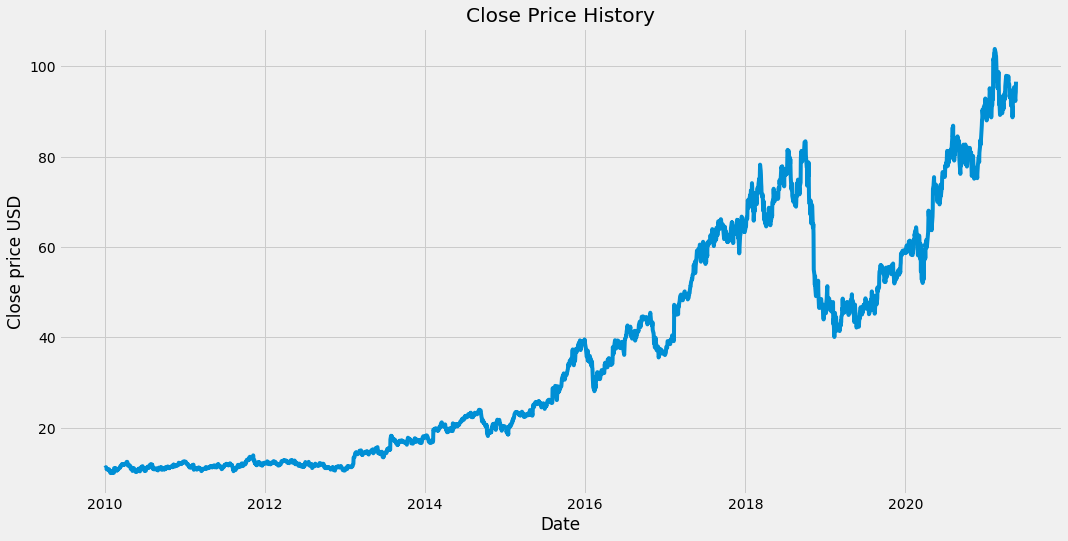

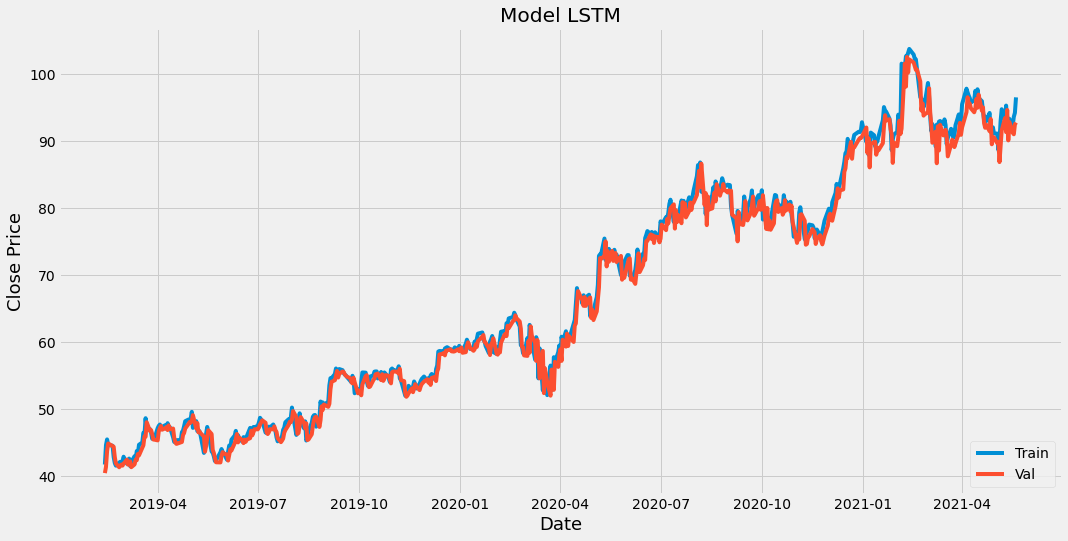

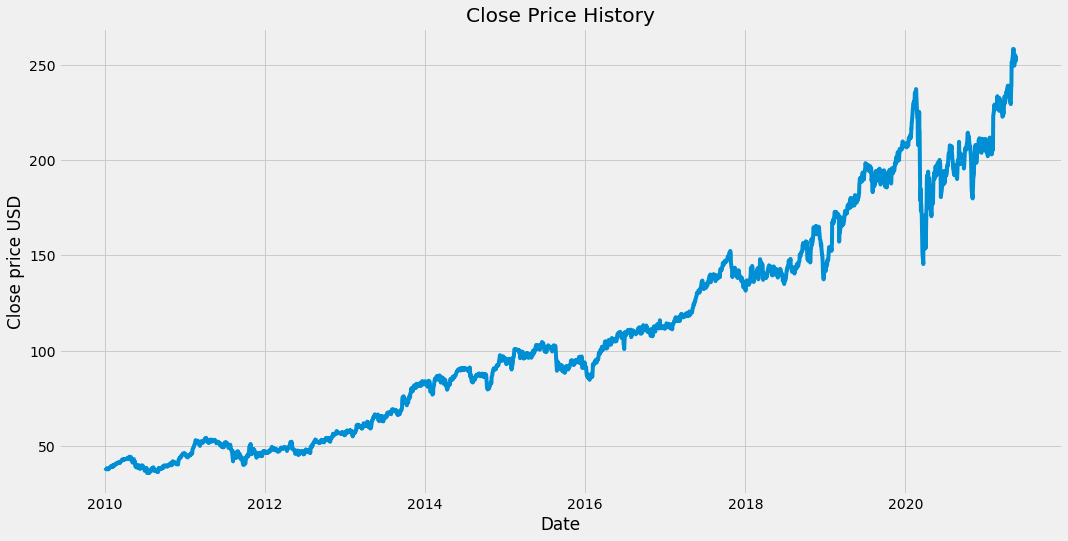

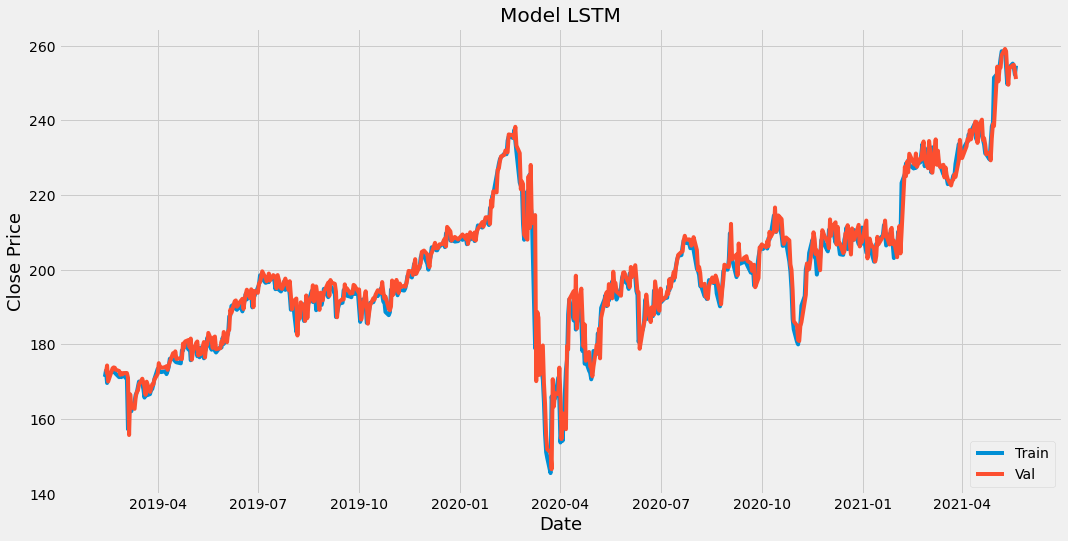

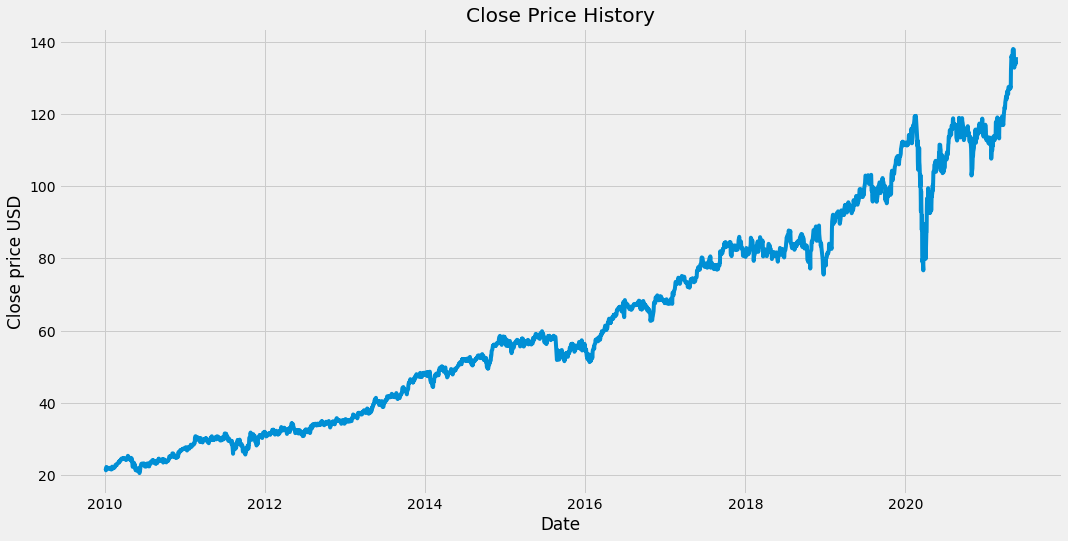

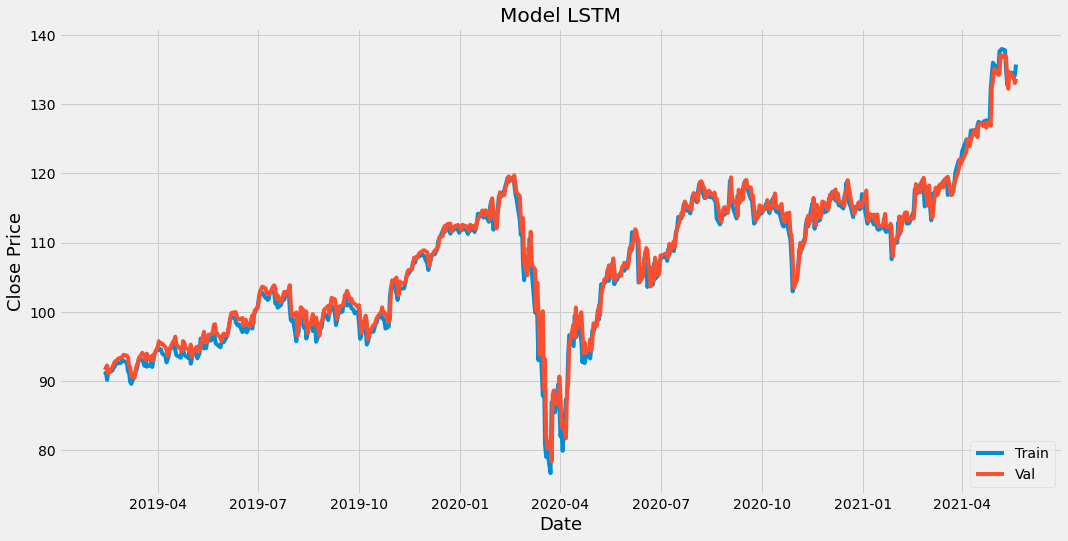

In [66]:
for i in range(len(companies)):
    pred(companies[i])

In [67]:
rmse

{'AAPL': 2.3779913996687427,
 'GOOG': 37.41507685473076,
 'MSFT': 4.537016843092027,
 'FB': 6.979161005623044,
 'AMZN': 55.87283409544218,
 'CMCSA': 0.8499611347494895,
 'TDS': 0.6609960077421693,
 'CVX': 2.2962607488243356,
 'KO': 0.8456437420310711,
 'JNJ': 2.1637360436493664,
 'MCD': 3.5628112051764225,
 'PSX': 2.319569243359131,
 'CAT': 3.284583057995236,
 'PLD': 1.9211686173016846,
 'INTC': 1.4527905058359727,
 'DIS': 3.5390124505170846,
 'TSN': 1.5607496350786798,
 'KMX': 2.389967765098778,
 'XOM': 1.5891308796187387,
 'AEP': 1.5290144494399895,
 'C': 1.6442458845141144,
 'XRAY': 1.203981351937036,
 'WRK': 1.2638169124621055,
 'KIM': 0.4619901843706672,
 'CAH': 1.1594768105322306,
 'MMM': 3.1558372041351137,
 'HD': 4.661572621775708,
 'WM': 1.9435275097624578,
 'ATVI': 1.6888887535328876,
 'AON': 3.922588194268155,
 'MMC': 1.8019001824398289}

In [69]:
avg = 0
for :
    
avg /= len(rmse)

TypeError: unsupported operand type(s) for +=: 'int' and 'str'